**FRAUD DETECTION**

Financial fraud poses significant challenges to financial institutions and consumers, resulting in substantial financial losses. Detecting financial fraud is an essential task to minimize its impact. This study aims to compare supervised learning techniques for detecting fraudulent transactions in imbalanced and undersampled datasets.

The research involves collecting and pre-processing transaction data, followed by the application of four supervised learning algorithms: Gradient Boosted Trees, K-Nearest Neighbours, Multi-Layer Perceptron (MLP) using scikit-learn, and MLP using Keras. The models are optimized through hyperparameter tuning and evaluated based on various performance metrics, including F1 score, precision, recall, and confusion matrix.

The results demonstrate the effectiveness of these algorithms in detecting fraudulent transactions. The comparative analysis highlights the strengths and weaknesses of each algorithm in handling imbalanced and undersampled datasets. The findings contribute to the development of robust fraud detection systems and provide insights for future research in this domain.


**Objectives**

The objectives of this study are as follows:

a. To explore various supervised learning techniques for fraud detection, including logistic regression, support vector machines, decision trees, Instance-based learning algorithms, neural networks, and ensemble methods.

b. To evaluate the performance of these techniques on an imbalanced financial datasets using appropriate performance metrics, such as precision, recall, F1-score, and confusion metrics.

c. To identify the most effective technique(s) for fraud detection in imbalanced datasets and propose strategies for improving their performance, such as data resampling, cost-sensitive learning, or algorithm-specific adaptations.


**Installation and Importation of Necessary Libraries**

In [4]:
pip install imblearn pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fsspec


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
#Libraries for data analysis and preprocessing
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
import fsspec


#Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for data resampling
from sklearn.utils import resample

#Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


#Libraries for deep learning
import tensorflow as tf
from tensorflow.keras import optimizers, losses, metrics
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
# Import the Sequential model from Keras
from keras.models import Sequential


#Libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from scipy.stats import uniform, randint

#Libraries for evaluation
import ydata_profiling as pp
from ydata_profiling import ProfileReport
from sklearn.metrics import classification_report, accuracy_score

#Other libraries
import math


**Ingesting the DataSet**

In [6]:


# Reading in the Dataset as a DataFrame with pandas
# This code reads a CSV file named 'fraudTrain.csv' and stores the contents in a pandas DataFrame called 'df'.
# Make sure that the 'fraudTrain.csv' file is located in the same directory as this script.
df = pd.read_csv('C://Users//damia//OneDrive//Documents//GitHub//fraud-detection//Dataset//fraudTrain.csv')



**Data Description and Preprocessing**

- **Column Names**

In [7]:
#First, List all the columns in the dataset
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

This dataset contains transaction records with various attributes, which can be used to analyze and detect fraudulent activities. The attributes in the dataset include:

**Unnamed: 0** - An index column representing the row number.

**trans_date_trans_time** - The date and time of the transaction.

**cc_num** - The credit card number used in the transaction.

**merchant** - The merchant involved in the transaction.

**category** - The category of the product or service purchased.

**amt** - The transaction amount.

**first** - The first name of the cardholder.

**last** - The last name of the cardholder.

**gender** - The gender of the cardholder.

**street** - The cardholder's street address.

**city** - The cardholder's city.

**state** - The cardholder's state.

**zip** - The cardholder's zip code.

**lat** - The latitude of the cardholder's location.

**long** - The longitude of the cardholder's location.

**city_pop** - The population of the cardholder's city.

**job** - The cardholder's occupation.

**dob** - The cardholder's date of birth.

**trans_num** - The unique transaction number.

**unix_time** - The Unix timestamp of the transaction.

**merch_lat** - The latitude of the merchant's location.

**merch_long** - The longitude of the merchant's location.

**is_fraud** - A binary variable indicating whether the transaction is fraudulent (1) or not (0).


- **Preview of the first five rows in the Dataset**

In [45]:
# View the first 5 Rows of the DataFrame
# This code displays the first 5 rows of the 'df' DataFrame using the head() method.
# It is useful for getting a quick overview of the structure and content of the data.
first_5_rows = df.head(5)

# Display the first 5 rows of the DataFrame
print(first_5_rows)

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

After executing this code, you will see the first 5 rows of the 'fraudTrain.csv' dataset printed to the console. This allows you to quickly verify the structure of the data, check the column names, and see a sample of the values in the DataFrame.

- **Data Dimension**

In [46]:
# Inspecting the shape of the DataFrame
# This code returns the shape of the 'df' DataFrame as a tuple (number_of_rows, number_of_columns).
# It provides information about the size and dimensionality of the dataset.
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))


Number of Rows: 1296675
Number of Cols: 23


- **Check for Null values in the Dataset**

In [47]:
# Quick check if there are null values in the DataFrame
# This code checks if any null values exist in the 'df' DataFrame using the isnull() method.
# It returns True if there are null values, otherwise False.
null_values_exist = df.isnull().values.any()

# Display the result of the null value check
print("Are there any null values in the DataFrame?", null_values_exist)



Are there any null values in the DataFrame? False


After executing this code, False indicates that, there are no null values in the dataset. This is useful for identifying potential data quality issues and determining if any preprocessing or data cleaning steps are required before analyzing or modeling the data.

- **Data Types and Structure**

In [48]:
# Viewing the data types in the DataFrame
# This code displays information about the 'df' DataFrame, including the data types of each column,
# non-null counts, and memory usage, using the info() method.
# It is useful for getting an overview of the DataFrame's structure and identifying potential data type issues.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

This information is helpful for understanding the data and identifying any issues related to data types that may need to be addressed before further analysis or modeling.

- **Splitting the 'trans_date_trans_time' Column to Date and Time columns**

To perform a more comprehensive analysis, the 'trans_date_trans_time' column will be split into separate 'trans_date' and 'trans_time' columns. After the split, the original 'trans_date_trans_time' column will be dropped to avoid duplication.

Additionally, the df.info() output indicates that the 'trans_date_trans_time' and 'dob' columns are of the object datatype. To enable time-based analysis, such as calculating customers' ages or extracting information like the hour or day of the week when transactions occurred, these columns need to be converted to the datetime datatype.

In [8]:
# Split datetime column into separate date and time columns
# This code splits the 'trans_date_trans_time' column into separate 'trans_date' and 'trans_time' columns.
# The str.split() method is used with the 'expand' parameter set to True, resulting in a new DataFrame with the split columns.
df[['trans_date', 'trans_time']] = df['trans_date_trans_time'].str.split(' ', expand=True)

# Drop the original column
# This code removes the original 'trans_date_trans_time' column from the DataFrame using the drop() method.
df.drop(columns=['trans_date_trans_time'], inplace=True)

# Print the first five rows of the new columns
# This code displays the first five rows of the new 'trans_date' and 'trans_time' columns to verify the split operation.
print(df[['trans_date', 'trans_time']].head())


   trans_date trans_time
0  2019-01-01   00:00:18
1  2019-01-01   00:00:44
2  2019-01-01   00:00:51
3  2019-01-01   00:01:16
4  2019-01-01   00:03:06


This enables more granular time-based analysis by separating date and time information.

- **Change DataType**

In [9]:
# Converting 'dob' to datetime datatype
# This code converts the 'dob' column to the datetime datatype using the pd.to_datetime() function.
df['dob'] = pd.to_datetime(df['dob'])

# Converting 'trans_date' to datetime datatype
# This code converts the 'trans_date' column to the datetime datatype using the pd.to_datetime() function.
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Converting 'trans_time' to datetime datatype
# This code converts the 'trans_time' column to the datetime datatype using the pd.to_datetime() function.
df['trans_time'] = pd.to_datetime(df['trans_time'])

# Print the data types of the converted columns
# This code displays the data types of the 'dob', 'trans_date', and 'trans_time' columns to verify the conversion.
print("Data type of 'dob':", df['dob'].dtype)
print("Data type of 'trans_date':", df['trans_date'].dtype)
print("Data type of 'trans_time':", df['trans_time'].dtype)

Data type of 'dob': datetime64[ns]
Data type of 'trans_date': datetime64[ns]
Data type of 'trans_time': datetime64[ns]


Converting the 'dob', 'trans_date', and 'trans_time' columns to the datetime datatype is important because it enables more efficient and accurate handling of date and time-related data. With the datetime datatype, you can easily perform operations like calculating the age of the users, the time difference between transactions, or extracting meaningful features such as the day of the week or the month when the transactions occurred.

Datetime conversion facilitates the extraction of new features from the date and time columns, which may contribute to improving the performance of the machine learning models. Additionally, many libraries and functions are specifically designed to work with datetime objects, making data manipulation and analysis more convenient and efficient.

- **Creating an Age Column**

In [10]:
# Creating an Age column in the dataset
# This code calculates the age of each customer using their date of birth ('dob') and the current date and time.
now = dt.datetime.now()
df['age'] = (now - df['dob']).astype('<m8[Y]')

# Preview the new 'age' column
# This code displays the first five rows of the new 'age' column to verify the age calculation.
print(df['age'].head())



0    35.0
1    44.0
2    61.0
3    56.0
4    37.0
Name: age, dtype: float64


This code snippet creates a new 'age' column in the dataset by calculating the age of each customer using their date of birth ('dob') and the current date and time. The difference between the current date (now) and the 'dob' column is computed, and the resulting timedelta is converted to years using the .astype('<m8[Y]') method.

The Age column that was created above is important for various reasons:

It provides an insight into the demographic distribution of the dataset based on age, which can help in understanding the target audience and tailoring marketing strategies accordingly.

Age can be an important factor in predicting customer behavior and preferences. For example, younger customers might have different spending habits than older customers.

Age can also be used in segmenting customers and creating targeted marketing campaigns for different age groups.

Age can be a relevant feature for building predictive models for fraud detection or credit risk assessment.

- **Plotting the Distribution of Age in the Dataset**

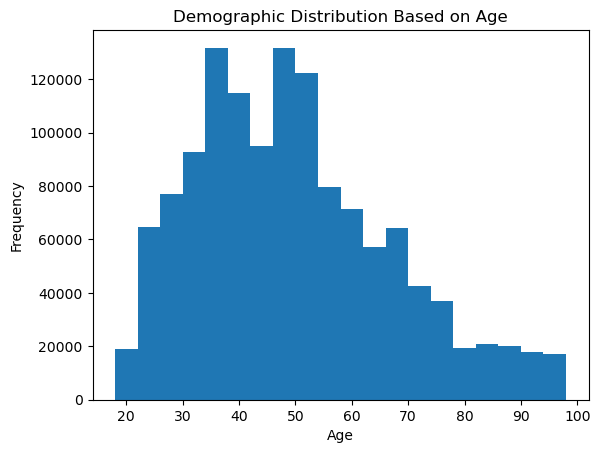

In [873]:
# A histogram of the age column
# This code creates a histogram of the 'age' column with 20 bins using the plt.hist() function from the matplotlib library.
plt.hist(df['age'], bins=20)

# Set the title and labels
# This code sets the title, x-axis label, and y-axis label for the histogram.
plt.title('Demographic Distribution Based on Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
# This code displays the histogram plot.
plt.show()


After executing this code, you will see a histogram plot of the 'age' column, which provides a visual representation of the demographic distribution based on age in the dataset. This can be useful for understanding the age distribution of customers and identifying any trends or patterns related to age.

_**Insight**_: The distribution of age in the dataset reveals a correlation between age and credit card usage. As age increases, the utilization of credit cards also rises, peaking at ages 35 and 55. However, after reaching these peaks, there is a marked decline in credit card usage as people get older. This insight may suggest specific age demographics that are more prone to engage in credit card transactions, informing further analysis and potential targeting strategies for financial institutions.

- **Relationship between Age and Amount**

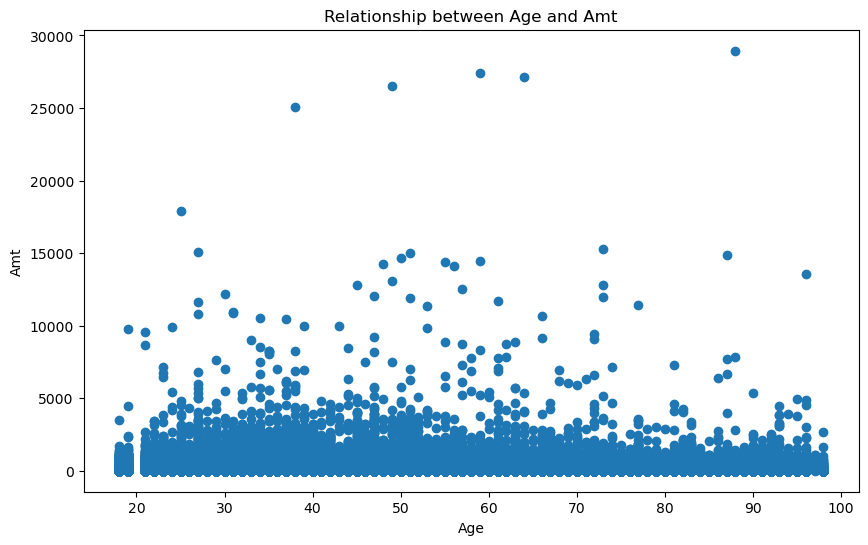

In [302]:
# Create a scatter plot of the Age and Amt columns
plt.figure(figsize=(10, 6))  # Create a figure object for the plot and set the size to (10, 6)
plt.scatter(df['age'], df['amt'])  # Create a scatter plot of age vs. amount using the scatter function from matplotlib
plt.xlabel('Age')  # Set the x-axis label to 'Age'
plt.ylabel('Amt')  # Set the y-axis label to 'Amt'
plt.title('Relationship between Age and Amt')  # Set the title of the plot to 'Relationship between Age and Amt'
plt.show()  # Display the plot


This scatter plot illustrates the relationship between age and transaction amount, enabling the identification of trends or patterns associated with specific age groups and their spending habits. The visualization can also assist in detecting potential outliers, which may represent anomalous transactions or data errors. By closely examining these outliers, valuable insights into the factors affecting transaction amounts can be gained. If necessary, appropriate actions, such as further investigation or data cleaning, can be undertaken to ensure the integrity and accuracy of the dataset and subsequent analysis.

- **Data Transformation**

In [11]:
# Transforming the 'amt' column for better visualization as part of data preprocessing
# This code applies a log10 transformation to the 'amt' (amount) column and adds a small value (0.001) to handle any zero values.
# The result is stored in a new column 'amt_transformed'.
df['amt_transformed'] = np.log10(df['amt'] + 0.001)

# Transforming the 'city_pop' column for better visualization
# This code applies a log10 transformation to the 'city_pop' column and adds a small value (0.001) to handle any zero values.
# The result is stored in a new column 'city_pop_transformed'.
df['city_pop_transformed'] = np.log10(df['city_pop'] + 0.001)



This code snippet transforms the 'city_pop' (city population) column for better visualization as part of the data preprocessing, in addition to the transformation of the 'amt' (amount) column. The transformation is achieved by applying the log10 function to the 'city_pop' column and adding a small value (0.001) to handle any zero values. The result is stored in a new column called 'city_pop_transformed'.

Transforming the 'amt' columnand 'city_pop' column can help visualize the data more effectively by reducing the impact of extreme values or outliers, which can otherwise dominate the visualization and make it difficult to identify patterns or trends. By using the log10 transformation, the range of city population values and transaction amount are compressed, allowing for a more balanced and interpretable representation of the data.

- **Visualizing the Data Transformation**

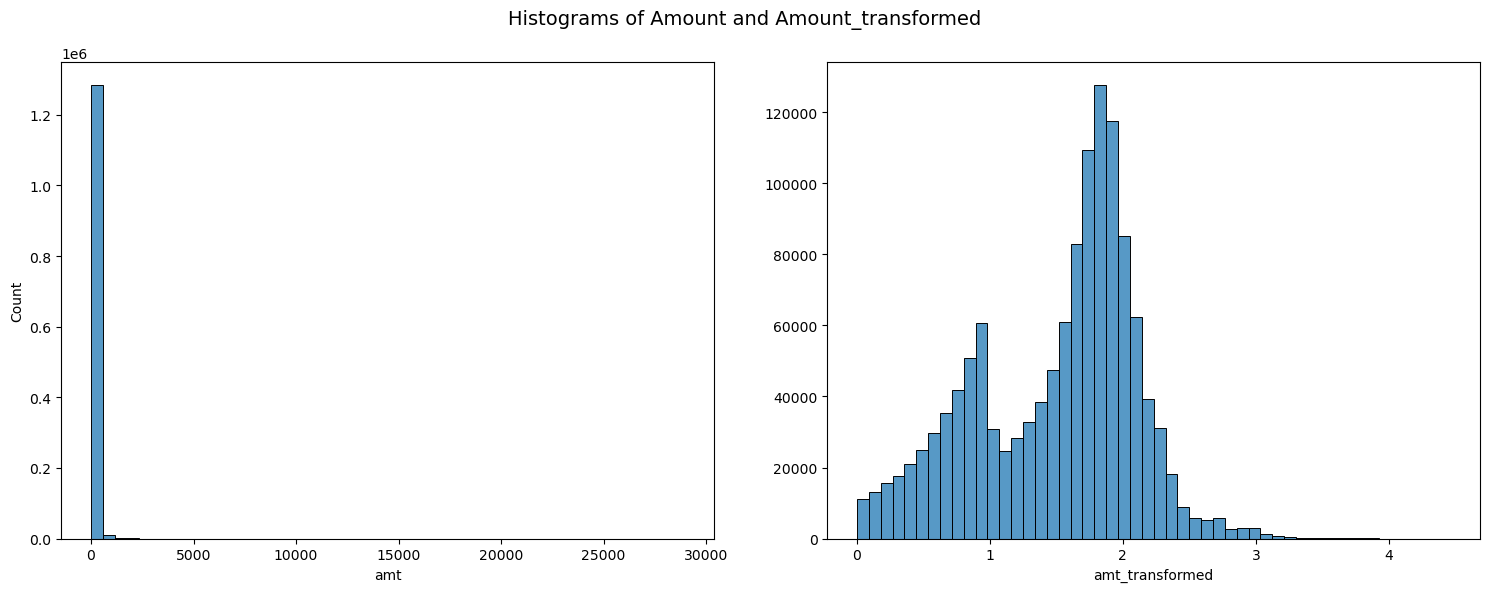

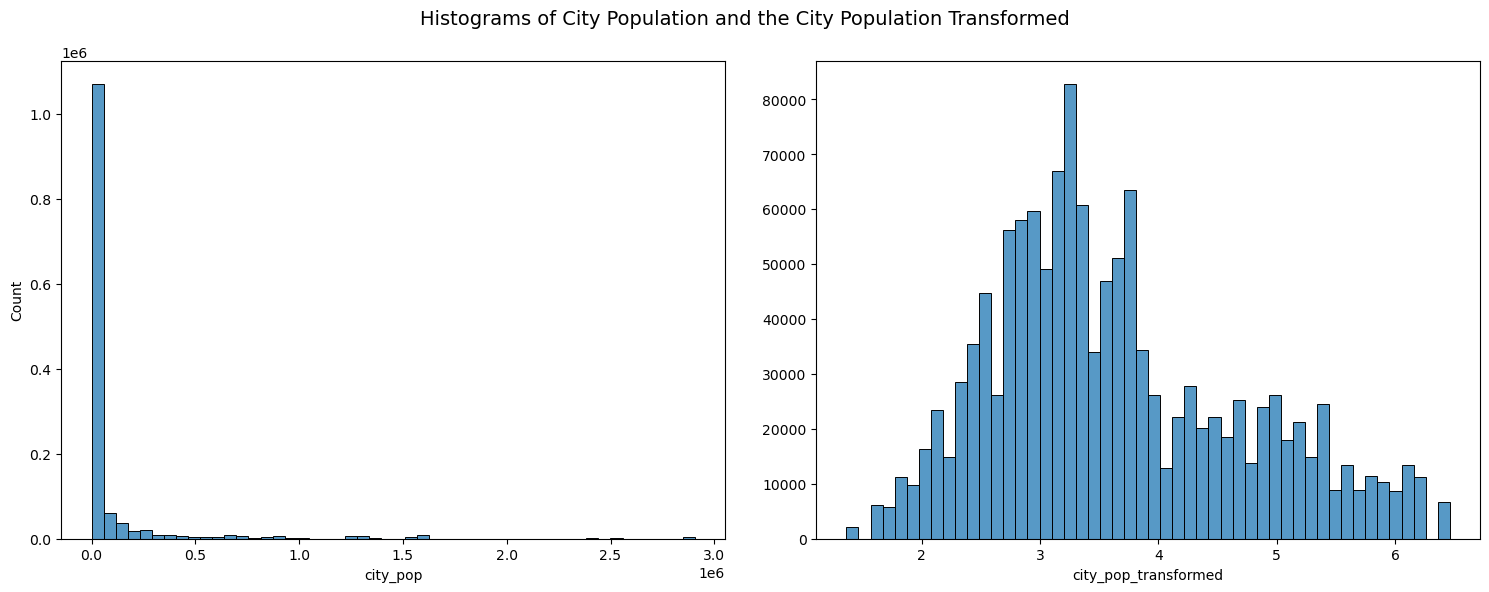

In [304]:
# A Histogram to show 'amt' and 'amt_transformed'
bins = 50
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Plot the histograms using seaborn's histplot function
sns.histplot(data=df, x='amt', bins=bins, ax=ax[0])
sns.histplot(data=df, x='amt_transformed', bins=bins, ax=ax[1])

# Set the labels and title
ax[1].set_ylabel(" ")
plt.suptitle("Histograms of Amount and Amount_transformed", size=14)
plt.tight_layout()

# Show the plot
plt.show()

# A Histogram to show 'city_pop' and 'city_pop_transformed'
bins = 50
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Plot the histograms using seaborn's histplot function
sns.histplot(data=df, x='city_pop', bins=bins, ax=ax[0])
sns.histplot(data=df, x='city_pop_transformed', bins=bins, ax=ax[1])

# Set the labels and title
ax[1].set_ylabel(" ")
plt.suptitle("Histograms of City Population and the City Population Transformed", size=14)
plt.tight_layout()

# Show the plot
plt.show()


This code snippet creates two sets of histograms side by side. The first set shows the original 'amt' (amount) column and the transformed 'amt_transformed' column. The second set of histograms displays the original 'city_pop' (city population) column and the transformed 'city_pop_transformed' column. Each histogram is created using seaborn's histplot() function with 50 bins.

After executing this code, you will see two sets of histograms. The left histograms show the distribution of the original 'amt' and 'city_pop' columns, while the right histograms display the distribution of the transformed 'amt_transformed' and 'city_pop_transformed' columns. Comparing these histograms allows you to observe the effect of the log10 transformation on the distribution of transaction amounts and city populations, which can help with visualization and interpretation of the data by reducing the impact of extreme values or outliers.

- **Boxplot Comparison of Amount and Transformed Amount and City Population**

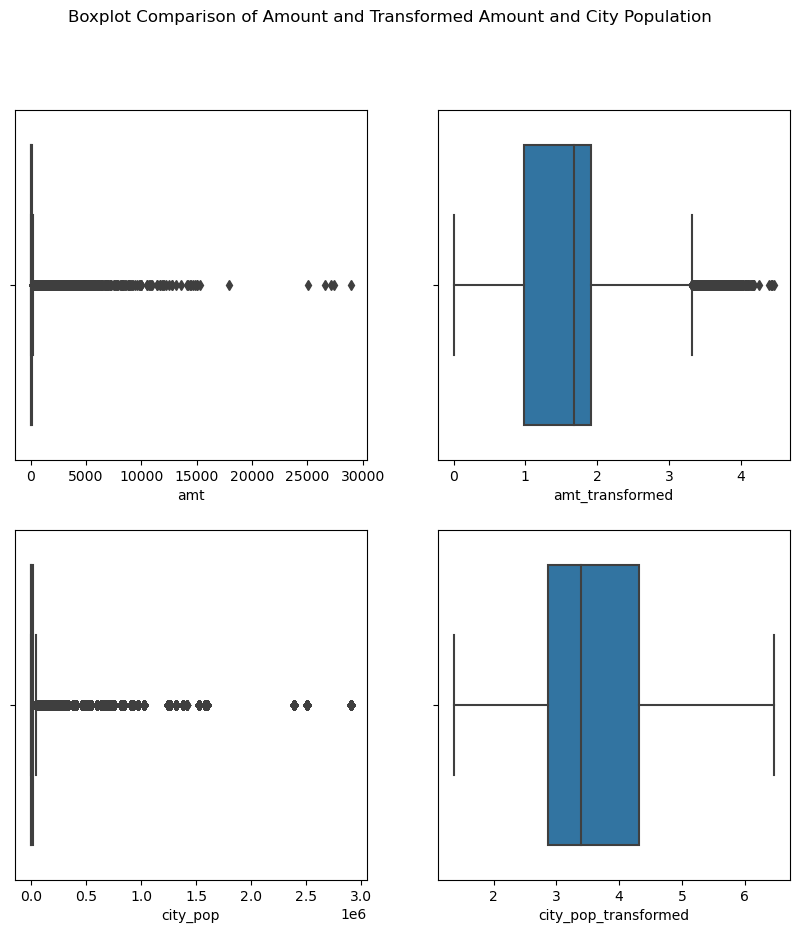

In [305]:
# Comparison of Amount and Transformed Amount with a BoxPlot
# Comparison of city_pop and Transformed city_pop with a BoxPlot

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

# Create boxplots for each variable
sns.boxplot(x=df['amt'], ax=axs[0][0])
sns.boxplot(x=df['amt_transformed'], ax=axs[0][1])
sns.boxplot(x=df['city_pop'], ax=axs[1][0])
sns.boxplot(x=df['city_pop_transformed'], ax=axs[1][1])

# Set the main title for the figure
fig.suptitle('Boxplot Comparison of Amount and Transformed Amount and City Population')

# Show the plot
plt.show()



After executing this code, you will see a 2x2 grid of boxplots. The top row compares the original 'amt' column with the 'amt_transformed' column, while the bottom row compares the original 'city_pop' column with the 'city_pop_transformed' column. These boxplots allow you to observe the effect of the log10 transformation on the distribution and spread of transaction amounts and city populations, which can help with visualization and interpretation of the data by reducing the impact of extreme values or outliers.

The boxplot above shows some outliers in the 'amt' field of the dataset.

In a fraud analysis, outliers may indicate fraudulent activity or anomalies in the data. Outliers are values that are significantly higher or lower than the majority of the other values in the dataset. Handling outliers in a fraud analysis can be tricky, as they could either be genuine transactions that are not fraudulent but appear as outliers or fraudulent transactions that need to be identified and dealt with. For now, the outliers would not be removed.

**Exploratory Data Analysis**

In [148]:

# Generating a Profile Report for the DataFrame
# This code generates a comprehensive summary report of the 'df' DataFrame using the pandas-profiling library.
# The report contains an overview of the data, including statistics, distributions, and potential issues.
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Display the generated report in a Jupyter Notebook
profile.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\damia\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

- **Insights**: From the Profile report above, it can be observed that it is essential to remove the trans_num and Unnamed: 0 columns from the dataset for the following reasons:

trans_num: This column contains unique values that identify each transaction. While these values are useful for tracking individual transactions, they do not provide any meaningful information for analyzing trends, patterns, or relationships in the data. Including this column in the analysis may introduce noise and potentially reduce the performance of machine learning models.

Unnamed: 0: This column consists of serial numbers that are essentially duplicated by the default index created by Pandas. Including this column in the analysis adds no additional information and may unnecessarily increase the dimensionality of the dataset. Removing this column simplifies the dataset and ensures that only relevant features are used for analysis and modeling.

In [12]:
# Remove 'trans_num' and 'Unnamed: 0' columns from the dataset
df = df.drop(['trans_num', 'Unnamed: 0'], axis=1)

# Display the first few rows of the updated dataset
print(df.head())


             cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534208663984                 fraud_Keeling-Crist       misc_pos   

      amt      first     last gender                        street  \
0    4.97   Jennifer    Banks      F                561 Perry Cove   
1  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393   
2  220.11     Edward  Sanchez      M      594 White Dale Suite 530   
3   45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038   
4   41.96      Tyler   Garcia      M              408 Bradley Rest   

             city state  ...        dob   unix_time  merch_lat  merch_long  \
0  Moravian Falls    NC  ... 1988-03-09  1325376018  36.

The df.profile_report() method (in this case, ProfileReport(df, title="Pandas Profiling Report", explorative=True)) generates a comprehensive summary report of the 'df' DataFrame using the pandas-profiling library. The report contains an overview of the data, including statistics, variable types, distributions, correlations, missing values, and potential issues. It is particularly useful for understanding the structure and content of a new dataset, as well as for identifying any data quality issues.

By calling the profile.to_widgets() method, the generated report is displayed as interactive widgets in a Jupyter Notebook. If you want to save the report as an HTML file, you can use the profile.to_file("report.html") method.

**Plotting for Category against Amount to check out for outliers**

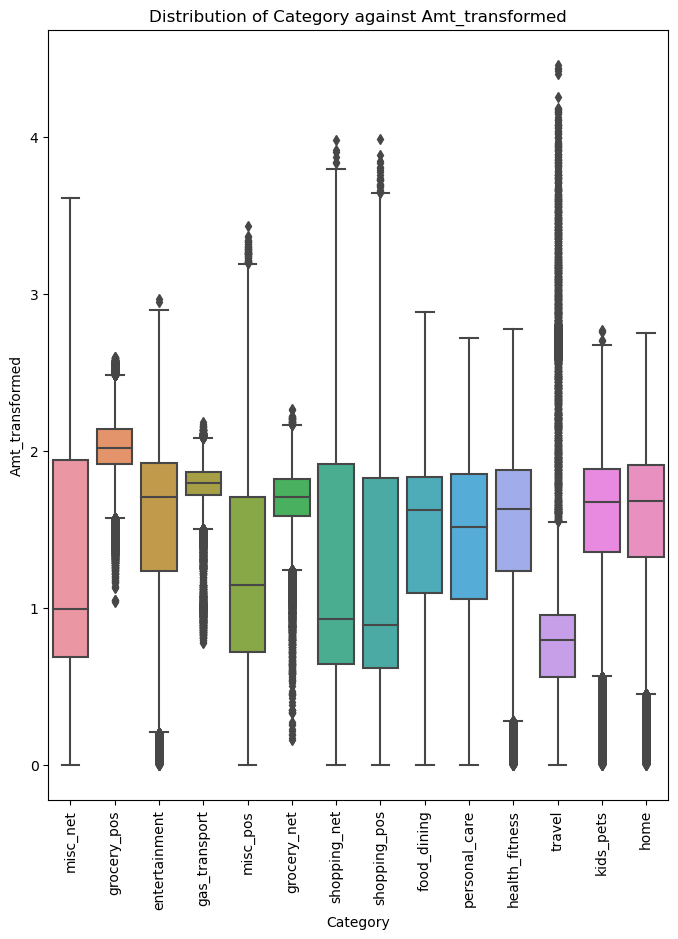

In [306]:
# Create a boxplot showing the distribution of 'amt_transformed' for each category
plt.figure(figsize=(8, 10))
sns.boxplot(x='category', y='amt_transformed', data=df)

# Set the title and labels
plt.title('Distribution of Category against Amt_transformed')
plt.xlabel('Category')
plt.ylabel('Amt_transformed')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()



After executing this code, you will see a boxplot displaying the distribution of the transformed transaction amounts for each category. This visualization can help you identify any differences or trends in transaction amounts across categories, such as which categories have higher or lower median transaction amounts or more variation in transaction amounts. The x-axis labels are rotated 90 degrees for better readability.

- **Selecting Categorical Columns from the Dataset**

- - *Further analysis to identify categorical columns with high cardinality*

In [55]:
# Select categorical columns
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

# Identify categorical columns with high cardinality (more than 20 unique values)
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes == "O"]

# Remove high cardinality columns from categorical columns
cat_cols = [col for col in cat_cols if col not in cat_but_car]

# Print the resulting categorical columns
print('Lesser number of distinct variables: ', cat_cols)
print('High cardinality categorical variables: ', cat_but_car)


Lesser number of distinct variables:  ['category', 'gender']
High cardinality categorical variables:  ['merchant', 'first', 'last', 'street', 'city', 'state', 'job']


The code snippet above first selects all the categorical columns in the dataset. Then, it identifies the categorical columns with high cardinality, which are columns with more than 20 unique values. The high cardinality columns are removed from the list of categorical columns, and the resulting lists of lesser and high cardinality categorical columns are printed.

Exploring the distribution of the 'category' and 'gender' columns is necessary because these are categorical variables with a relatively low number of unique values. Analyzing the distribution of these variables can provide insights into the relationships between different transaction categories, gender, and other variables in the dataset. For example, it may reveal trends or patterns related to the transaction amounts or fraud rates within different categories or between different genders. Understanding these relationships can be useful for developing more accurate and effective models for predicting fraud or other outcomes based on the available data.

- **Distribution of the Categories**

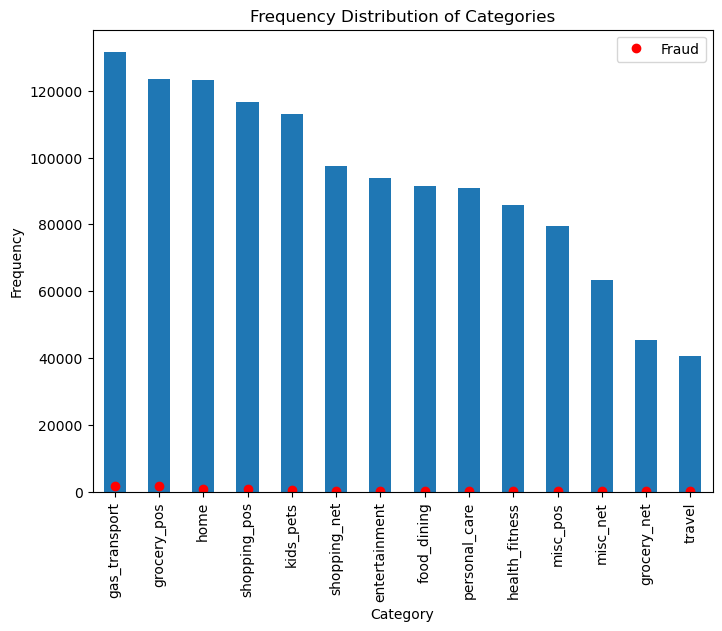

In [308]:
# Count the number of fraudulent transactions for each category
fraud_count = df[df['is_fraud'] == 1]['category'].value_counts()

# Create a bar plot showing the frequency distribution of transaction categories
plt.figure(figsize=(8, 6))
ax = df['category'].value_counts().plot(kind='bar')

# Set the title and labels
plt.title('Frequency Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Add a single red dot for the legend
plt.plot([], [], 'ro', label='Fraud')

# Add a dot for each category with fraud
for i, category in enumerate(fraud_count.index):
    ax.plot(i, fraud_count[category], 'ro')

# Add a custom legend to the plot
plt.legend(handles=[plt.Line2D([], [], color='red', marker='o', linestyle='None', label='Fraud')], loc='best')

# Show the plot
plt.show()




This code snippet creates a bar plot that shows the frequency distribution of transaction categories, with a red dot indicating the number of fraudulent transactions for each category.
This visualization can help you identify trends or patterns related to fraud occurrences across different transaction categories, such as which categories have higher or lower rates of fraudulent transactions.

- **Insights**: The visualization above provides insight into which categories people spend the most money on. It also reveals that fraudulent activities occur in every category, highlighting the need for in-depth analysis across all categories.

- **Visualize the distribution of Genders in the Dataset**

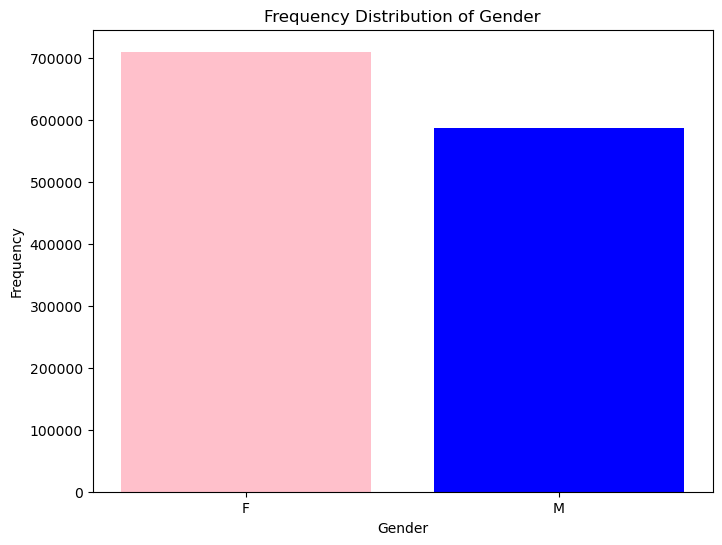

In [310]:
# Create a bar plot showing the frequency distribution of gender in the dataset
plt.figure(figsize=(8, 6))

# Calculate the frequency of each gender in the dataset
gender_counts = df['gender'].value_counts()

# Define the colors for the bars
colors = ['pink', 'blue']

# Create the bar plot using the calculated frequencies and defined colors
plt.bar(gender_counts.index, gender_counts.values, color=colors)

# Set the title and labels
plt.title('Frequency Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Show the plot
plt.show()



The code generates a bar plot displaying the frequency distribution of gender in the dataset. This visualization can help you understand the balance between different genders in the dataset, which can be useful when analyzing trends or patterns related to transaction amounts, fraud rates, or other factors within different genders.

- **Insight**: The plot above demonstrates that, in this dataset, females use credit cards more frequently than males. This insight could be valuable for marketing firms aiming to target specific gender demographics in their campaigns.

- **Feature Engineering**

**Label Encoding**

Label encoding converts each category in a variable into a numerical label, with each label representing a different category. This is useful for variables where there is a natural order or relationship between categories. It will also be useful in machine learning algorithms that require numerical inputs.

For this analysis category and gender column would be converted to numbers using Label Encoding.

In [13]:
#Label Encoding

#Label encoding converts each category in a variable into a numerical label, 
# with each label representing a different category.


# Instantiate the LabelEncoder object
le = LabelEncoder()

# Perform label encoding on the 'category' column
df['category'] = le.fit_transform(df['category'])

# Perform label encoding on the 'gender' column
df['gender'] = le.fit_transform(df['gender'])

# Select only the 'gender' and 'category' columns
subset = df[['gender', 'category']]

# Print the resulting subset of the DataFrame
print(subset)




         gender  category
0             0         8
1             0         4
2             1         0
3             1         2
4             1         9
...         ...       ...
1296670       1         0
1296671       1         1
1296672       1         1
1296673       1         1
1296674       1         1

[1296675 rows x 2 columns]


This code snippet performs label encoding on the 'category' and 'gender' columns of the DataFrame using the LabelEncoder class from scikit-learn. Label encoding is a technique that converts categorical variables into numerical values by assigning an integer to each unique category value. This can be useful for preparing the data for machine learning algorithms that work with numerical data.

**Frequency Endoding**


Frequency encoding transforms each category in a variable into a numerical value by calculating the frequency of each category's occurrence in the dataset. This is particularly useful for high cardinality features, where the number of unique categories is large. By representing categories based on their frequency, it helps capture the significance or commonality of each category in the dataset.

This encoding technique is beneficial when dealing with high cardinality features because it reduces the dimensionality of the data while retaining meaningful information. It is less prone to overfitting compared to one-hot encoding, which creates a separate binary feature for each unique category. Additionally, frequency encoding works well with machine learning algorithms that can capture non-linear relationships, as it transforms categorical data into numerical values that convey the importance of each category based on its frequency in the dataset.

In [14]:
# Frequency Encoder is a technique that replaces categorical values in a column with their corresponding occurrence frequencies, 
# thus transforming them into numerical representations for use in machine learning algorithms.

# Encoding the remaining Categorical columns using Frequency Encoder

# Define the list of columns to encode
columns_to_encode = ['merchant', 'first', 'last', 'street', 'city', 'state', 'job']

# Loop through each column in the list
for col in columns_to_encode:
    # Compute the frequency of each unique value in the column
    # 'normalize=True' returns the relative frequencies of unique values
    freq_encoding = df[col].value_counts(normalize=True)
    
    # Map the computed frequencies to the corresponding original values in the column
    # This will replace the original categorical values with their respective frequencies
    df[col] = df[col].map(freq_encoding)

df.head(5)



This code snippet encodes the remaining categorical columns in the DataFrame using a frequency encoding technique. Frequency encoding is a method that transforms categorical variables into numerical values by calculating the relative frequency of each unique category value in the dataset.

After executing this code, the specified categorical columns in the DataFrame will be transformed into numerical values representing their relative frequencies. This can be helpful when preparing the data for machine learning algorithms that require numerical inputs.

- **Feature Scaling**

Scaling the features of a dataset is done to ensure that all the features contribute equally to the analysis. It is especially important when the features have different units or scales. Without scaling, features with larger units or scales can dominate the analysis, leading to biased results. Scaling also helps in improving the performance of some machine learning algorithms, such as K-Nearest Neighbors (KNN) and Support Vector Machines (SVM), which are sensitive to feature scales.

The main advantage of scaling the features of a dataset is that it can lead to a more accurate and reliable analysis and predictions. It can also improve the interpretability of the results obtained from the analysis.

In [58]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_date',
       'trans_time', 'age', 'amt_transformed', 'city_pop_transformed'],
      dtype='object')

In [15]:
# SCALING THE FEATURES OF THE DATASET
# Scaling the features of a dataset is done to ensure that all the features contribute equally to the analysis.

#Save the names of the columns as a list
old_columns = df.columns.tolist()

# Create an instance of the RobustScaler class
scaler = RobustScaler()

# Define the list of columns to exclude from scaling
columns_to_exclude = ['is_fraud']

# Create a list of columns to scale by excluding the specified columns
columns_to_scale = [col for col in df.columns if col not in columns_to_exclude]

# Loop through each column in the list of columns to scale
for column in columns_to_scale:
    # Scale the column using the RobustScaler's fit_transform method and reshape the result
    df[f'scaled_{column}'] = scaler.fit_transform(df[column].values.reshape(-1,1))

# Drop the original unscaled columns from the DataFrame
df.drop(columns=columns_to_scale, inplace=True)

# Print the info of the modified DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   is_fraud                     1296675 non-null  int64  
 1   scaled_cc_num                1296675 non-null  float64
 2   scaled_merchant              1296675 non-null  float64
 3   scaled_category              1296675 non-null  float64
 4   scaled_amt                   1296675 non-null  float64
 5   scaled_first                 1296675 non-null  float64
 6   scaled_last                  1296675 non-null  float64
 7   scaled_gender                1296675 non-null  float64
 8   scaled_street                1296675 non-null  float64
 9   scaled_city                  1296675 non-null  float64
 10  scaled_state                 1296675 non-null  float64
 11  scaled_zip                   1296675 non-null  float64
 12  scaled_lat                   1296675 non-n

This code snippet scales the numerical columns in the DataFrame using the RobustScaler from the scikit-learn library. RobustScaler is less sensitive to outliers and scales the data based on the interquartile range (IQR).
After executing this code, the DataFrame will have new columns containing the scaled numerical values, which can be helpful when preparing the data for machine learning algorithms that are sensitive to feature scaling.

- **Comparing the Distribution of the target Class using KDE plots**

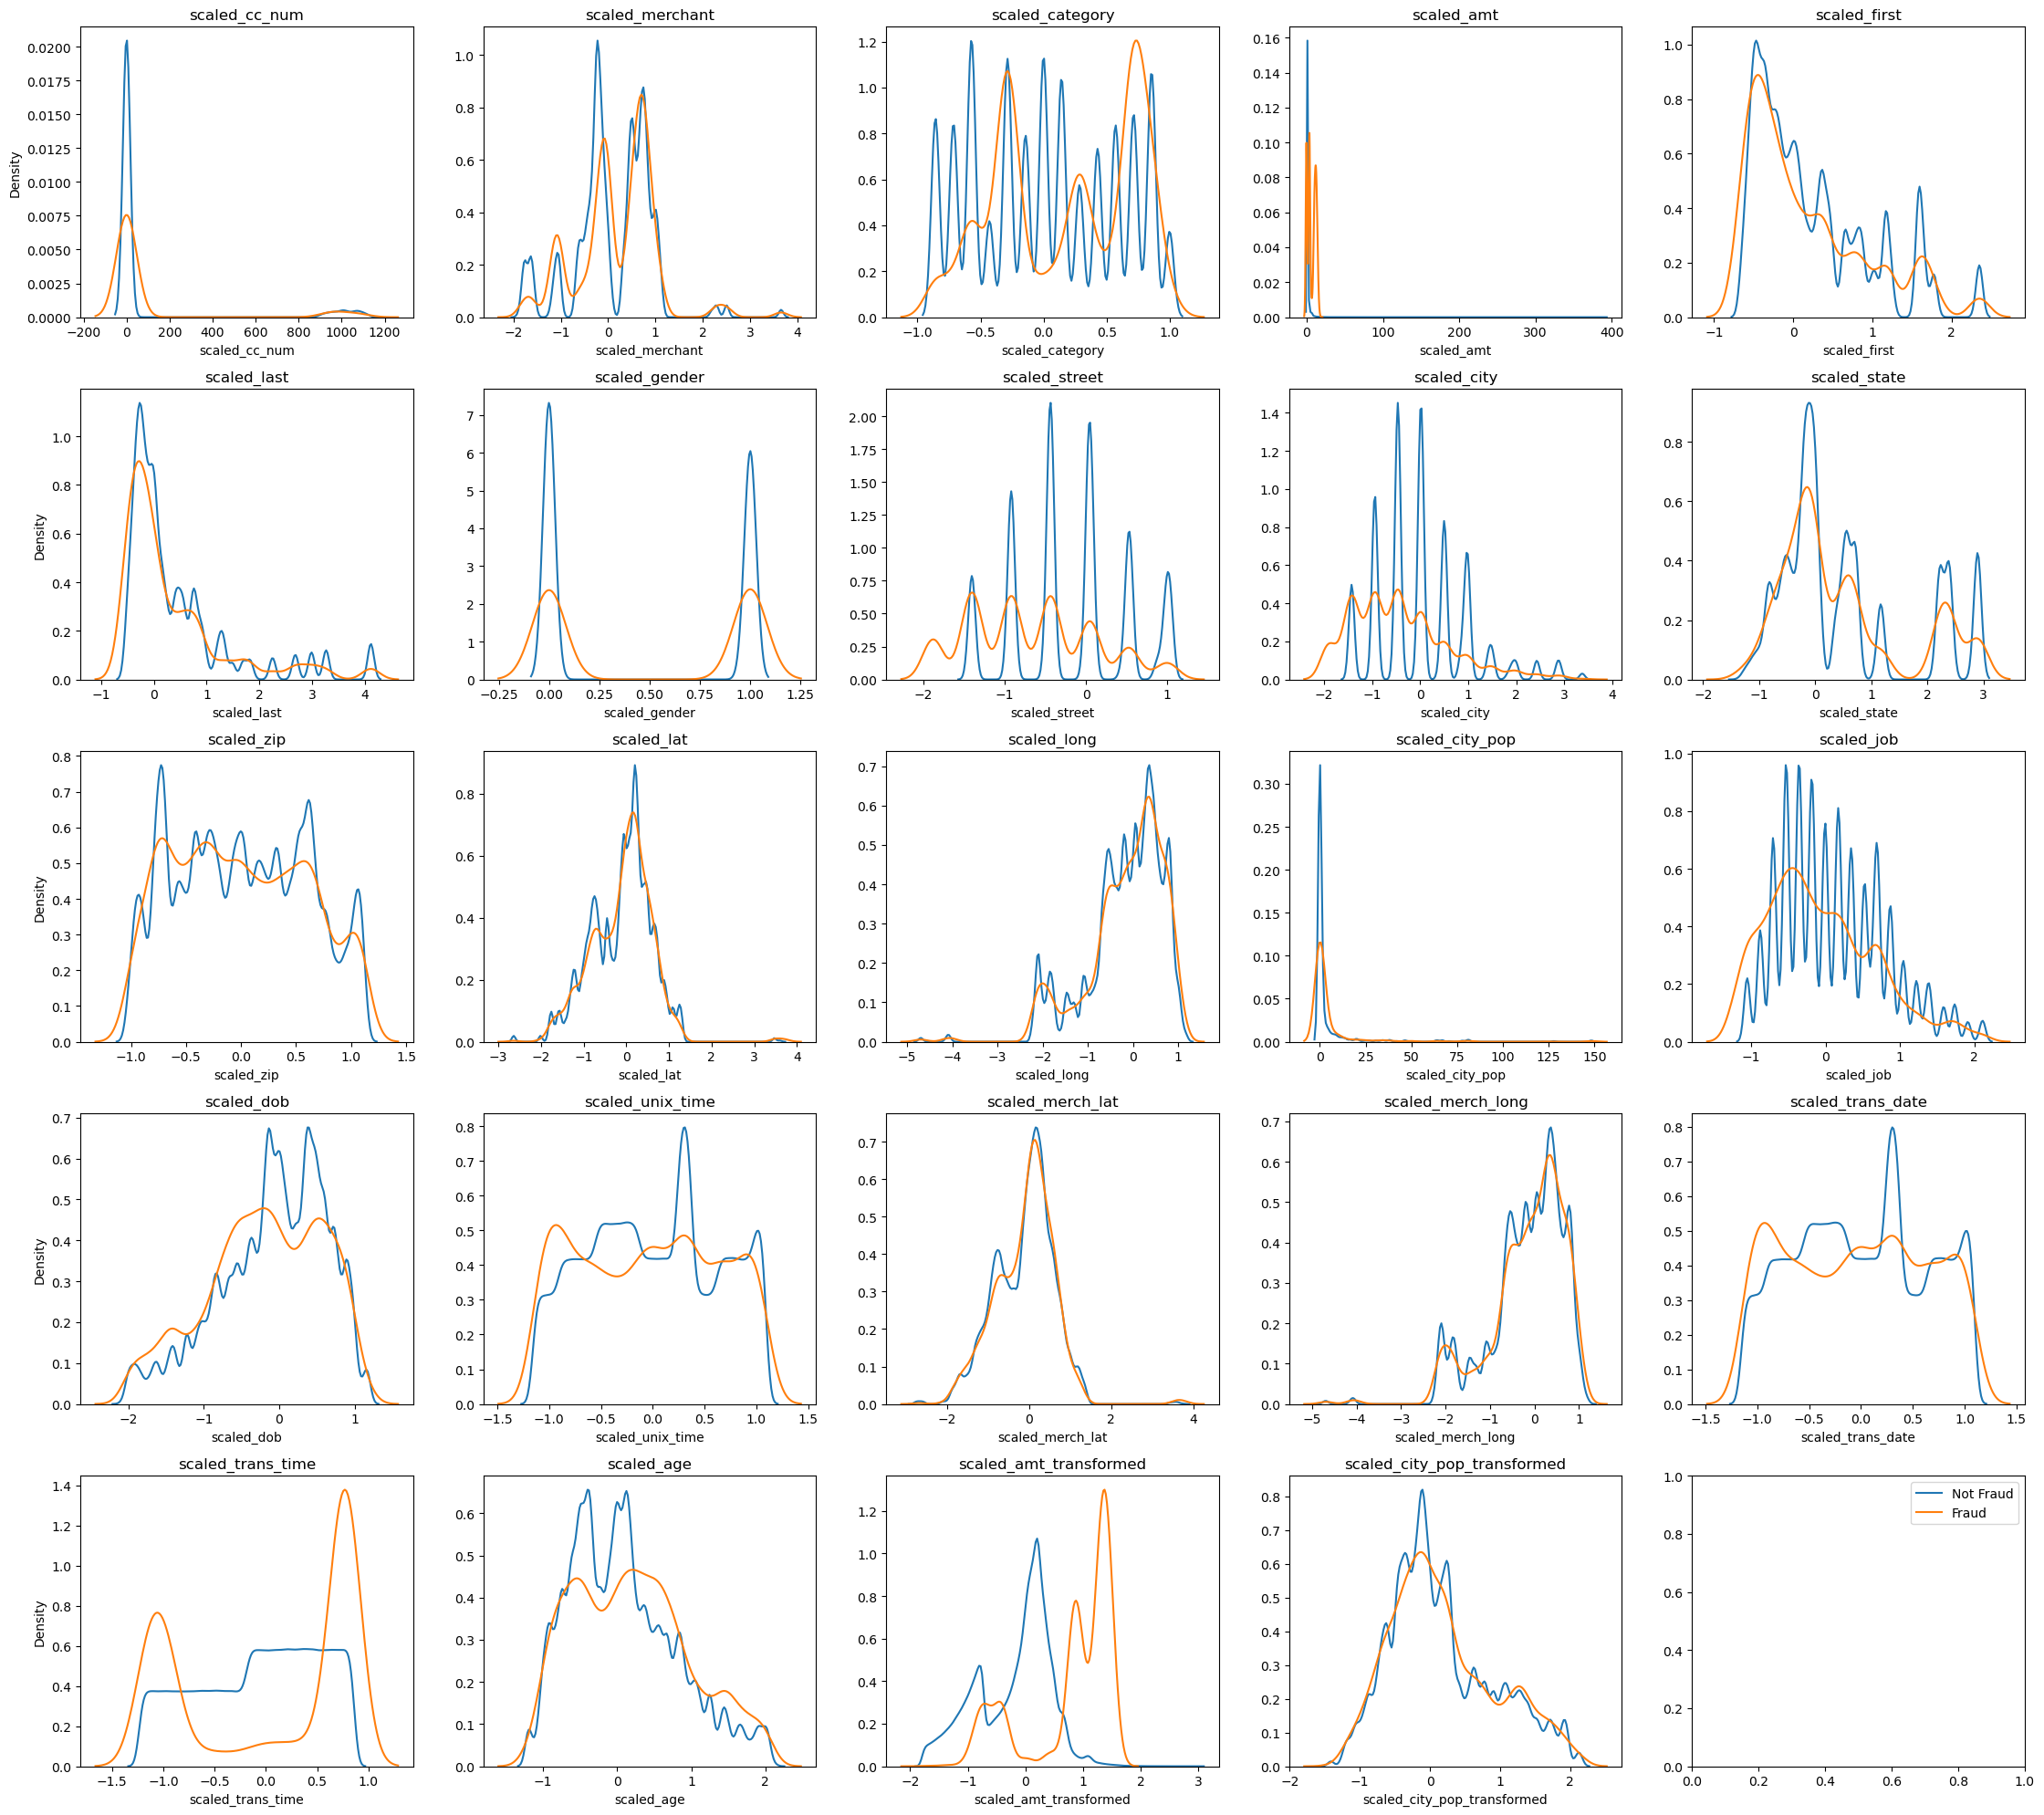

In [316]:
# Split the data into separate DataFrames for each target class
df_0 = df[df['is_fraud'] == 0]
df_1 = df[df['is_fraud'] == 1]

# Set up the plot layout
cols = list(df.columns)
cols.remove('is_fraud')
ncols = 5
nrows = math.ceil(len(cols) / ncols)

# Create the subplots
fig, ax = plt.subplots(nrows, ncols, figsize=(4.5 * ncols, 4 * nrows))

# Plot the distribution of each column for both target classes
for i, col in enumerate(cols):
    sns.kdeplot(df_0[col], ax=ax[i // ncols, i % ncols], label='Not Fraud')
    sns.kdeplot(df_1[col], ax=ax[i // ncols, i % ncols], label='Fraud')
    ax[i // ncols, i % ncols].set_title(col)
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")

# Add a legend and adjust the plot layout
handles, labels = ax[0,0].get_legend_handles_labels()
plt.legend(handles, labels)
plt.tight_layout()
plt.show()


This code snippet creates a grid of Kernel Density Estimate (KDE) plots for each feature in the dataset, comparing the distributions of the 'Not Fraud' class (is_fraud = 0) with the 'Fraud' class (is_fraud = 1). These plots provide insights into the differences in distributions between the two classes, which can be useful for understanding how each feature might contribute to fraud detection.

After running this code, you will see a grid of KDE plots, each showing the distribution of a feature for both the 'Not Fraud' and 'Fraud' classes. This can help you identify which features have distinct distributions between the two classes and may be useful for fraud detection.

- ***Insight***: The KDE plots reveal that there are notable correlations between fraud and non-fraud cases for the 'trans_time' and 'amt_transformed' features. These insights highlight the importance of considering these features when selecting the most relevant ones for machine learning algorithms. By focusing on features with strong relationships to fraud detection, the models may be able to better identify patterns and improve their overall performance.

**Highlighting the Imbalanced Nature of the Target Class**

In [60]:
# Showing the imbalance nature of the Target Class

# Print the percentage of 'No Frauds' and 'Frauds' in the dataset
# The 'round' function is used to limit the displayed percentage to 2 decimal places
print('No Frauds', round(df['is_fraud'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['is_fraud'].value_counts()[1]/len(df) * 100, 2), '% of the dataset\n')

# Print the absolute number of non-fraud and fraud cases in the dataset
print('Number of non-fraud cases:', df['is_fraud'].value_counts()[0])
print('Number of fraud cases:', df['is_fraud'].value_counts()[1])


No Frauds 99.42 % of the dataset
Frauds 0.58 % of the dataset

Number of non-fraud cases: 1289169
Number of fraud cases: 7506


This code snippet calculates and prints the percentage of non-fraud and fraud cases in the dataset, as well as the number of cases for each class. This helps to understand the imbalance in the dataset between non-fraud and fraud cases.

After executing this code, you will see the percentage of non-fraud and fraud cases in the dataset, as well as the number of cases for each class. This information is useful for understanding the imbalance in the dataset, which can impact the performance of machine learning models trained on this data.

- **Visualizing the Target Class**

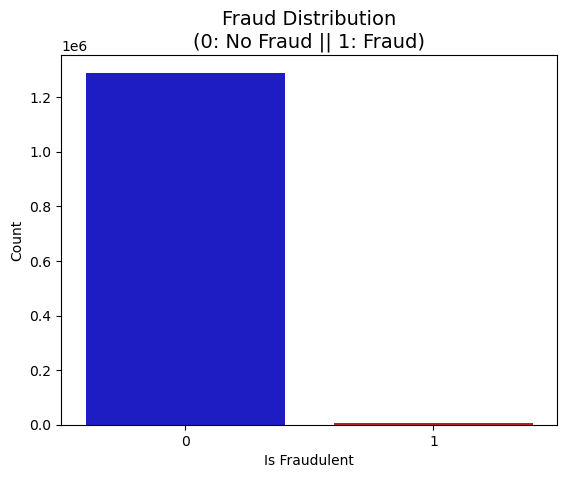

In [318]:
# Define the colors for the countplot
colors = ["#0101DF", "#DF0101"]

# Create a countplot using seaborn to visualize the distribution of fraud and non-fraud cases in the dataset
sns.countplot(x='is_fraud', data=df, palette=colors)

# Set the title, xlabel and ylabel for the countplot
plt.title('Fraud Distribution\n(0: No Fraud || 1: Fraud)', fontsize=14)
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')

# Show the plot
plt.show()


A bar chart displaying the count of non-fraudulent and fraudulent transactions in the dataset, which will give you an overview of the class distribution. This is important to understand if the dataset is imbalanced, which can impact the performance of machine learning algorithms.

- **Feature Selection**



The importance of feature selection lies in its ability to improve the performance of machine learning models by reducing the dimensionality of the input data, simplifying the model, and reducing the risk of overfitting. By selecting the most relevant and informative features, the model can focus on the key relationships within the data, resulting in better generalization and predictive accuracy.

Recursive Feature Elimination (RFE) is a good choice for feature selection because it is a systematic and efficient method that works by recursively removing the least important features, building a model, and evaluating its performance. The process continues until the specified number of features is reached. RFE is particularly useful for selecting the most informative features from a large set of features, as it ranks them based on their importance in the model. By utilizing RFE with logistic regression, we can ensure that we are selecting features that contribute to the model's predictive power while minimizing the risk of overfitting.

In [61]:
#Feature Selection

# Separate the features (X) and the target variable (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create an instance of the logistic regression model
lr_model = LogisticRegression()

# Create an instance of the RFE class, specifying the number of features to select
rfe = RFE(lr_model, n_features_to_select=5)

# Fit the RFE model to the training data
rfe.fit(X_train, y_train)

# Get the transformed data with the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train a logistic regression model on the reduced feature set
lr_model_rfe = LogisticRegression()
lr_model_rfe.fit(X_train_rfe, y_train)

# Evaluate the performance of the model on the test set
y_pred = lr_model_rfe.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


c:\ProgramData\Anaconda3\envs\lab_environment_dl1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\envs\lab_environment_dl1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Accuracy: 0.9941889833612895


In [62]:
# 'rfe' is the RFE model fitted on the dataset
# 'X_train' is the training data set of features

# Get the indices of the selected features
selected_features_indices = rfe.support_

# Get the names of the selected features
selected_features_names = X_train.columns[selected_features_indices]

# Print the names of the selected features
print(selected_features_names)


Index(['scaled_merchant', 'scaled_category', 'scaled_street',
       'scaled_trans_time', 'scaled_amt_transformed'],
      dtype='object')


- **Creating a Dataset of just the selected Features**

In [16]:
selected_features_df = ['is_fraud', 'scaled_street', 'scaled_dob', 'scaled_trans_time', 'scaled_age',
       'scaled_amt_transformed']

df_copy = df[selected_features_df]

In [17]:
#Printing the head and tail of the dataset
df_copy

,is_fraud,scaled_street,scaled_dob,scaled_trans_time,scaled_age,scaled_amt_transformed
0,0,0.026465,0.500391,-1.234403,-0.500000,-1.048328
1,0,0.973535,0.104253,-1.233773,-0.125000,0.377907
2,0,-1.414934,-0.565130,-1.233603,0.583333,0.711854
3,0,-1.424386,-0.362094,-1.232997,0.375000,-0.025302
4,0,0.016068,0.420918,-1.230329,-0.416667,-0.057782
...,...,...,...,...,...,...
1296670,0,-0.460302,-0.571381,-0.169518,0.583333,-0.518419
1296671,0,-1.388469,0.164304,-0.169251,-0.166667,0.039149
1296672,0,0.066163,-0.336421,-0.168936,0.333333,0.372243
1296673,0,0.022684,0.192321,-0.167384,-0.208333,0.211284


**Thank you for taking the time to explore my Fraud Detection analysis. If you'd like to connect with me further, please feel free to add me on LinkedIn and follow me on GitHub. I'm always open to collaboration opportunities and would be happy to discuss any projects you have in mind. Your support and interest are greatly appreciated!**

Best regards,

Damian


**MACHINE LEARNING**



- **SPLITTING THE IMBALANCED DATASET**

This section demonstrates how to split an imbalanced dataset into train and test sets for a fraud detection problem. The goal is to ensure that both sets maintain the same proportion of positive (fraud) and negative (non-fraud) instances as in the original dataset.

First, the target variable 'is_fraud' is separated from the feature variables (X) by dropping it from the DataFrame. The target variable is then stored in the 'y' variable.

Next, the data is split into train and test sets using the 'train_test_split' function from the Scikit-learn library. A test set size of 30% is specified, and stratified sampling is used to maintain the same class distribution in both sets. The 'random_state' parameter is set to 42 to ensure reproducibility of results.

By performing these steps, the  dataset is prepared for further analysis and model training, taking into account the imbalanced nature of the target variable.

In [18]:
#SPLITTING THE IMBALANCE DATASET

# Separate the target variable (y) from the features (X)
X = df_copy.drop('is_fraud', axis=1)
y = df_copy['is_fraud']

# Split the data into train and test sets using stratified sampling
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Print the number of samples in the training and validation sets
print('Number of samples in training set:', len(train_x))
print('Number of samples in testing set:', len(test_y))


Number of samples in training set: 907672
Number of samples in testing set: 389003


**TRAINING AND EVALUATING FOUR SUPERVISED LEARNING ALGORITHMS/MODELS ON THE IMBALANCED DATASET**

- **BASELINE ALOGIRTHMS FOR THE IMBALANCED DATASET**

***GRADIENT BOOST TREE***

In [37]:
#Gradient Boost Tree
#Baseline Algorithm

# Create an instance of the Gradient Boosted Trees model with L2 regularization
gbc_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gbc_model.fit(train_x, train_y)

# Use the trained model to make predictions on the test data
y_pred = gbc_model.predict(test_x)

# Compute the f1 score, precision, and recall using the 'weighted' average
f1_gbt1 = f1_score(test_y, y_pred, average='binary')
precision_gbt1 = precision_score(test_y, y_pred, average='binary')
recall_gbt1 = recall_score(test_y, y_pred, average='binary')

# Print the evaluation metrics
print("F1 Score: ",f1_gbt1)
print("Precision: ",precision_gbt1)
print("Recall: ",recall_gbt1)

from sklearn.metrics import confusion_matrix


# Generate the confusion matrix
cm_gbt1 = confusion_matrix(test_y, y_pred)


# Store the results as a dictionary
cm_gbt1_dict = {'True Positive': cm_gbt1[1][1], 'True Negative': cm_gbt1[0][0], 'False Positive': cm_gbt1[0][1], 'False Negative': cm_gbt1[1][0]}

# Print the dictionary
print("\nResults of the Confusion Metrics for the Model; \n",cm_gbt1_dict)




F1 Score:  0.6493649917172832
Precision:  0.8583941605839416
Recall:  0.522202486678508

Results of the Confusion Metrics for the Model; 
 {'True Positive': 1176, 'True Negative': 386557, 'False Positive': 194, 'False Negative': 1076}


**K-NEAREST NEIGHBOR CLASSIFIER**

In [38]:
#KNN Baseline ALgorithm

# Create an instance of the KNN model
knn_model1 = KNeighborsClassifier()

# Fit the model to the training data
knn_model1.fit(train_x, train_y)

# Use the trained model to make predictions on the test set
y_pred = knn_model1.predict(test_x)

# Compute the f1 score, precision, and recall using the 'weighted' average
f1_knn1 = f1_score(test_y, y_pred, average='binary')
precision_knn1 = precision_score(test_y, y_pred, average='binary')

recall_knn1 = recall_score(test_y, y_pred, average='binary')

# Print the evaluation metrics
print("F1 Score: ",f1_knn1)
print("Precision: ",precision_knn1)
print("Recall: ",recall_knn1)


# Generate the confusion matrix
cm_knn1 = confusion_matrix(test_y, y_pred)


# Store the results as a dictionary
cm_knn1_dict = {'True Positive': cm_knn1[1][1], 'True Negative': cm_knn1[0][0], 'False Positive': cm_knn1[0][1], 'False Negative': cm_knn1[1][0]}

# Print the dictionary
print("\nResults of the Confusion Metrics for the Model; \n", cm_knn1_dict)

F1 Score:  0.6501950585175552
Precision:  0.7846829880728186
Recall:  0.5550621669626998

Results of the Confusion Metrics for the Model; 
 {'True Positive': 1250, 'True Negative': 386408, 'False Positive': 343, 'False Negative': 1002}


**MLP NEURAL NETWORK WITH SCIKIT LEARN**

In [39]:
#Baseline MLP NEURAL NETWORK WITH SCIKIT LEARN

# Define the input and output dimensions
input_dim = train_x.shape[1]
output_dim = 1

# Create a sequential model
model = Sequential()

# Add a dense layer with 64 units, ReLU activation function, and input dimension equal to the number of features
model.add(Dense(64, activation='relu', input_dim=input_dim))

# Add a dense layer with 32 units and ReLU activation function
model.add(Dense(32, activation='relu'))

# Add a dense layer with 1 unit and sigmoid activation function (for binary classification)
model.add(Dense(output_dim, activation='sigmoid'))

# Compile the model using binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data for 10 epochs
model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y))



# Create an instance of the MLPClassifier model
mlp_model = MLPClassifier(random_state=42)

# Fit the model to the training data
mlp_model.fit(train_x, train_y)

# Use the trained model to make predictions on the test set
y_pred = mlp_model.predict(test_x)

# Compute the f1 score, precision, and recall using the 'weighted' average
f1_mlp_scilearn1 = f1_score(test_y, y_pred, average='binary')
precision_mlp_scilearn1 = precision_score(test_y, y_pred, average='binary')
recall_mlp_scilearn1 = recall_score(test_y, y_pred, average='binary')

# Print the evaluation metrics
print("F1 Score: ", f1_mlp_scilearn1)
print("Precision: ", precision_mlp_scilearn1)
print("Recall: ", recall_mlp_scilearn1)


# Generate the confusion matrix
cm_mlp_scilearn1 = confusion_matrix(test_y, y_pred)


# Store the results as a dictionary
cm_mlp_scilearn1_dict = {'True Positive': cm_mlp_scilearn1[1][1], 'True Negative': cm_mlp_scilearn1[0][0], 'False Positive': cm_mlp_scilearn1[0][1], 'False Negative': cm_mlp_scilearn1[1][0]}

# Print the dictionary
print(cm_mlp_scilearn1_dict)


Epoch 1/10
28365/28365 [==============================] - 30s 1ms/step - loss: 0.0190 - accuracy: 0.9955 - val_loss: 0.0160 - val_accuracy: 0.9957
Epoch 2/10
28365/28365 [==============================] - 32s 1ms/step - loss: 0.0151 - accuracy: 0.9958 - val_loss: 0.0142 - val_accuracy: 0.9962
Epoch 3/10
28365/28365 [==============================] - 36s 1ms/step - loss: 0.0145 - accuracy: 0.9960 - val_loss: 0.0140 - val_accuracy: 0.9962
Epoch 4/10
28365/28365 [==============================] - 36s 1ms/step - loss: 0.0141 - accuracy: 0.9961 - val_loss: 0.0138 - val_accuracy: 0.9961
Epoch 5/10
28365/28365 [==============================] - 33s 1ms/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 0.0143 - val_accuracy: 0.9958
Epoch 6/10
28365/28365 [==============================] - 34s 1ms/step - loss: 0.0136 - accuracy: 0.9962 - val_loss: 0.0132 - val_accuracy: 0.9964
Epoch 7/10
28365/28365 [==============================] - 35s 1ms/step - loss: 0.0135 - accuracy: 0.9963 - val_loss: 0

**MLP NEURAL NETWORK WITH KERAS**

In [40]:
from keras.models import Sequential
from keras.layers import Dense

#Baseline Algorithm for MLP Neural Network with Keras

# Define the input and output dimensions
input_dim = train_x.shape[1]
output_dim = 1

# Create a sequential model
model = Sequential()

# Add a dense layer with 64 units, ReLU activation function, and input dimension equal to the number of features
model.add(Dense(64, activation='relu', input_dim=input_dim))

# Add a dense layer with 32 units and ReLU activation function
model.add(Dense(32, activation='relu'))

# Add a dense layer with 16 units and ReLU activation function
model.add(Dense(16, activation='relu'))

# Add a dense layer with 1 unit and sigmoid activation function (for binary classification)
model.add(Dense(output_dim, activation='sigmoid'))

# Compile the model using binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data for 10 epochs
model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y))

# Use the trained model to make predictions on the test set
y_pred = model.predict(test_x)

# Compute the f1 score, precision, and recall using the 'weighted' average

y_pred_binary = (y_pred > 0.5).astype(int)
f1_mlp_keras1 = f1_score(test_y, y_pred_binary, average='binary')
precision_mlp_keras1 = precision_score(test_y, y_pred_binary, average='binary')
recall_mlp_keras1 = recall_score(test_y, y_pred_binary, average='binary')


# Print the evaluation metrics
print("F1 Score: ", f1_mlp_keras1)
print("Precision: ", precision_mlp_keras1)
print("Recall: ", recall_mlp_keras1)

# Get the predicted labels as binary values
y_pred_binary = (y_pred > 0.5).astype(int)

# Get the confusion matrix
cm_mlp_keras1 = confusion_matrix(test_y, y_pred_binary)


# Store the results as a dictionary
cm_mlp_keras1_dict = {'True Positive': cm_mlp_keras1[1][1], 'True Negative': cm_mlp_keras1[0][0], 'False Positive': cm_mlp_keras1[0][1], 'False Negative': cm_mlp_keras1[1][0]}

# Print the dictionary
print(cm_mlp_keras1_dict)

Epoch 1/10
28365/28365 [==============================] - 38s 1ms/step - loss: 0.0192 - accuracy: 0.9953 - val_loss: 0.0165 - val_accuracy: 0.9956
Epoch 2/10
28365/28365 [==============================] - 38s 1ms/step - loss: 0.0149 - accuracy: 0.9959 - val_loss: 0.0142 - val_accuracy: 0.9961
Epoch 3/10
28365/28365 [==============================] - 38s 1ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.0141 - val_accuracy: 0.9960
Epoch 4/10
28365/28365 [==============================] - 39s 1ms/step - loss: 0.0138 - accuracy: 0.9961 - val_loss: 0.0136 - val_accuracy: 0.9963
Epoch 5/10
28365/28365 [==============================] - 39s 1ms/step - loss: 0.0135 - accuracy: 0.9962 - val_loss: 0.0134 - val_accuracy: 0.9961
Epoch 6/10
28365/28365 [==============================] - 38s 1ms/step - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.0131 - val_accuracy: 0.9964
Epoch 7/10
28365/28365 [==============================] - 38s 1ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0

**COMPARATIVE ANALYSIS OF EVALUATION METRICS FOR BASELINE MODELS** 

In [41]:
# Store the evaluation metrics in a dictionary
metrics_dict = {
    'Model': ['Gradient Boosted Tree', 'KNN', 'MLP-Scilearn', 'MLP-Keras'],
    'F1 Score': [f1_gbt1, f1_knn1, f1_mlp_scilearn1, f1_mlp_keras1],
    'Precision': [precision_gbt1, precision_knn1, precision_mlp_scilearn1, precision_mlp_keras1],
    'Recall': [recall_gbt1, recall_knn1, recall_mlp_scilearn1, recall_mlp_keras1]
}

# Convert the metrics dictionary to a Pandas DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Store the confusion matrix values in a dictionary
cm_dict = {
    'Model': ['Gradient Boosted Tree', 'KNN', 'MLP-Scilearn', 'MLP-Keras'],
    'True Positive': [cm_gbt1[1][1], cm_knn1[1][1], cm_mlp_scilearn1[1][1], cm_mlp_keras1[1][1]],
    'True Negative': [cm_gbt1[0][0], cm_knn1[0][0], cm_mlp_scilearn1[0][0], cm_mlp_keras1[0][0]],
    'False Positive': [cm_gbt1[0][1], cm_knn1[0][1], cm_mlp_scilearn1[0][1], cm_mlp_keras1[0][1]],
    'False Negative': [cm_gbt1[1][0], cm_knn1[1][0], cm_mlp_scilearn1[1][0], cm_mlp_keras1[1][0]]
}

# Convert the confusion matrix dictionary to a Pandas DataFrame
cm_df = pd.DataFrame(cm_dict)




In [98]:
print('TABLE OF THE EVALUATION METRICS FOR THE FOUR MODELS\n')

metrics_df

TABLE OF THE EVALUATION METRICS FOR THE FOUR MODELS



,Model,F1 Score,Precision,Recall
0,Gradient Boosted Tree,0.649365,0.858394,0.522202
1,KNN,0.649506,0.783563,0.554618
2,MLP-Scilearn,0.553319,0.855153,0.408970
3,MLP-Keras,0.638309,0.774051,0.543073


**PERFORMANCE OF BASELINE MODELS ON THE IMBALANCED DATASET: EVALUATION METRICS ANALYSIS**


This table displays the performance of four different machine learning models used in this fraud detection analysis. The models include Gradient Boosted Tree, K-Nearest Neighbors (KNN), Multi-Layer Perceptron (MLP) with scikit-learn, and MLP with Keras. The performance metrics used to evaluate these models are F1 Score, Precision, and Recall.

**Gradient Boosted Tree**: This model achieved an F1 Score of 0.649365, a Precision of 0.858394, and a Recall of 0.522202. The high precision indicates that the model correctly identified a high percentage of fraudulent transactions, but the relatively low recall suggests that it missed a significant number of actual fraud cases.

**KNN**: The K-Nearest Neighbors model scored an F1 Score of 0.649506, a Precision of 0.783563, and a Recall of 0.554618. Although it had a slightly better balance between precision and recall compared to the Gradient Boosted Tree, the overall performance is still quite similar.

**MLP-Scilearn**: The Multi-Layer Perceptron model implemented with scikit-learn had an F1 Score of 0.553319, a Precision of 0.855153, and a Recall of 0.408970. Despite having a high precision, the low recall value indicates that this model missed many actual fraud cases, resulting in a lower overall F1 Score.

**MLP-Keras**: The Multi-Layer Perceptron model implemented with Keras achieved an F1 Score of 0.638309, a Precision of 0.774051, and a Recall of 0.543073. The performance of this model is slightly better than MLP-Scilearn but still not as balanced as the KNN model.

In conclusion, all four models show different strengths and weaknesses in detecting fraudulent transactions. Further optimization and feature engineering might help improve the performance of these models, and additional experiments with different algorithms or model architectures could also be considered.


In [99]:
print('TABLE CONTAINING THE CONFUSION METRICS RESULTS FOR THE FOUR MODELS\n')

cm_df

TABLE CONTAINING THE CONFUSION METRICS RESULTS FOR THE FOUR MODELS



,Model,True Positive,True Negative,False Positive,False Negative
0,Gradient Boosted Tree,1176,386557,194,1076
1,KNN,1249,386406,345,1003
2,MLP-Scilearn,921,386595,156,1331
3,MLP-Keras,1223,386394,357,1029


**EVALUATING BASELINE MODEL PERFORMANCE: A CONFUSION MATRIX PERSPECTIVE ON IMBALANCED DATASET**

This table displays the confusion matrix for each of the four machine learning models used in your fraud detection analysis: Gradient Boosted Tree, K-Nearest Neighbors (KNN), Multi-Layer Perceptron (MLP) with scikit-learn, and MLP with Keras. The confusion matrix is a table that helps visualize the performance of a classification model by presenting the counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

Gradient Boosted Tree: The model correctly identified 1,176 fraudulent transactions (True Positive) and 386,557 non-fraudulent transactions (True Negative). However, it incorrectly classified 194 non-fraudulent transactions as fraudulent (False Positive) and failed to detect 1,076 actual fraudulent transactions (False Negative).

KNN: The K-Nearest Neighbors model correctly classified 1,249 fraudulent transactions (True Positive) and 386,406 non-fraudulent transactions (True Negative). It misclassified 345 non-fraudulent transactions as fraudulent (False Positive) and missed 1,003 actual fraud cases (False Negative).

MLP-Scilearn: The Multi-Layer Perceptron model implemented with scikit-learn correctly identified 921 fraudulent transactions (True Positive) and 386,595 non-fraudulent transactions (True Negative). However, it falsely classified 156 non-fraudulent transactions as fraudulent (False Positive) and did not detect 1,331 actual fraudulent transactions (False Negative).

MLP-Keras: The Multi-Layer Perceptron model implemented with Keras correctly classified 1,223 fraudulent transactions (True Positive) and 386,394 non-fraudulent transactions (True Negative). It incorrectly labeled 357 non-fraudulent transactions as fraudulent (False Positive) and failed to identify 1,029 actual fraud cases (False Negative).

In conclusion, the confusion matrices for each model help provide a deeper understanding of their performance in detecting fraudulent transactions. It is essential to consider the trade-offs between false positives and false negatives, as each has different implications for fraud detection systems. Further optimization, feature engineering, and experimenting with different algorithms or model architectures may improve the performance of these models.

***Insight***: **Comparative Analysis and Conclusion of Model Performances**

Based on the evaluation metrics (F1 Score, Precision, and Recall) and the confusion matrix, the K-Nearest Neighbors (KNN) model seems to have performed the best among the four models.

The KNN model has the highest F1 Score, which is a balanced metric taking into account both Precision and Recall. It also has the second-lowest number of False Positives and the second-lowest number of False Negatives among the models. While the Gradient Boosted Tree model has a slightly better Precision, the KNN model has a higher Recall, making it a better choice considering the nature of fraud detection tasks, where detecting fraudulent cases (higher Recall) is crucial.

However, it's essential to note that the performance difference between the KNN and Gradient Boosted Tree models is minimal, and additional optimization or feature engineering could potentially lead to better performance for any of the models.

**OPTIMIZED ALGORITHMS FOR THE IMBALANCED DATASET**

- **GRADIENT BOOSTED TREE**

RandomsearchCV was used to optimize the Gradient Boosted Tree algorithm.

In [ ]:
#Gradient Boost Tree Hyperparameters used to tune the model
#Because of the amount of time the RandomsearchCV consumes, the search was done one after the other

'n_estimators': range(50, 500, 50),
    'max_depth': range(3, 10),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 10),
    'subsample': uniform(0.5, 0.5),
    'max_features': ['sqrt', 'log2', None]
    'learning_rate': uniform(0.01, 0.5),


In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform


#RANDOMSEARCHCV

# Define the hyperparameter space to search over
param_dist = {
     'learning_rate': uniform(0.01, 0.5)
    
}

# Create an instance of the Gradient Boosted Trees model with L2 regularization
gbc_model = GradientBoostingClassifier(random_state=42)

# Create an instance of RandomizedSearchCV with 10-fold cross validation
rs_cv = RandomizedSearchCV(gbc_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the RandomizedSearchCV model to the training data
rs_cv.fit(train_x, train_y)

# Use the best model to make predictions on the test data
y_pred = rs_cv.predict(test_x)

# Compute the f1 score, precision, and recall using the 'binary' average
f1 = f1_score(test_y, y_pred, average='binary')
precision = precision_score(test_y, y_pred, average='binary')
recall = recall_score(test_y, y_pred, average='binary')

# Print the evaluation metrics
print("F1 Score: ",f1)
print("Precision: ",precision)
print("Recall: ",recall)

# Print the best hyperparameters
print("Best Hyperparameters: ", rs_cv.best_params_)


F1 Score:  0.6285554935861684
Precision:  0.8448275862068966
Recall:  0.5004440497335702
Best Hyperparameters:  {'learning_rate': 0.08799726016810132}


Optimized Algorithm

In [23]:
# Create an instance of the Gradient Boosted Trees model with L2 regularization
gbc_model1 = GradientBoostingClassifier(random_state=42, 
                                        learning_rate=0.0999726016810132, n_estimators=500, 
                                        max_depth= 3, min_samples_split=3,
                                        min_samples_leaf= 4, max_features='log2')

# Fit the model on the training data
gbc_model1.fit(train_x, train_y)

# Use the trained model to make predictions on the test data
y_pred = gbc_model1.predict(test_x)

# Compute the f1 score, precision, and recall using the 'weighted' average
f1_gbt2 = f1_score(test_y, y_pred, average='binary')
precision_gbt2 = precision_score(test_y, y_pred, average='binary')
recall_gbt2 = recall_score(test_y, y_pred, average='binary')

# Print the evaluation metrics
print("F1 Score: ",f1_gbt2)
print("Precision: ",precision_gbt2)
print("Recall: ",recall_gbt2)

# Generate the confusion matrix
cm_gbt2 = confusion_matrix(test_y, y_pred)


# Store the results as a dictionary
cm_gbt2_dict = {'True Positive': cm_gbt2[1][1], 'True Negative': cm_gbt2[0][0], 'False Positive': cm_gbt2[0][1], 'False Negative': cm_gbt2[1][0]}

# Print the dictionary
print(cm_gbt2_dict)

F1 Score:  0.6819984139571768
Precision:  0.8425865447419987
Recall:  0.5728241563055062
{'True Positive': 1290, 'True Negative': 386510, 'False Positive': 241, 'False Negative': 962}


- **K-NEAREST NEIGHBOUR**

BayesSearchCV was used to Optimize the KNN algorithm

In [94]:
#BayesSearchCV for KNN Hyperparameter tuning

# Define the hyperparameter search space
param_grid = {
    'n_neighbors': list(range(1, 50)),
    'weights': ['uniform', 'distance'],
    'p': (1, 2),
    #'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(1, 50))
}

# Create an instance of the KNN model
knn_model = KNeighborsClassifier()

# Create an instance of the BayesianSearchCV class
search = BayesSearchCV(
    estimator=knn_model,
    search_spaces=param_grid,
    n_iter=50,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the search object to the training data
search.fit(train_x, train_y)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", search.best_params_)
print("Best score:", search.best_score_)

# Use the best hyperparameters to make predictions on the test data
y_pred = search.predict(test_x)

# Compute the evaluation metrics
accuracy = accuracy_score(test_y, y_pred)

# Print the evaluation metrics
print(classification_report(test_y, y_pred))
print("Accuracy: ", accuracy)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\Users\damia\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\damia\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: OrderedDict([('leaf_size', 26), ('n_neighbors', 9), ('p', 1), ('weights', 'distance')])
Best score: 0.9961823688387705
              precision    recall  f1-score   support

           0       1.00      1.00    

In [ ]:
# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", search.best_params_)
print("Best score:", search.best_score_)

Optimized Algorithm

In [19]:
#Optimized KNN Algorithm

# Create an instance of the KNN model
knn_model2 = KNeighborsClassifier(weights='distance', p=1, n_neighbors=9, leaf_size=26, algorithm='ball_tree')

# Fit the model to the training data
knn_model2.fit(train_x, train_y)

# Use the trained model to make predictions on the test set
y_pred = knn_model2.predict(test_x)

# Compute the f1 score, precision, and recall using the 'weighted' average
f1_knn2 = f1_score(test_y, y_pred)
precision_knn2 = precision_score(test_y, y_pred)
recall_knn2 = recall_score(test_y, y_pred)

# Print the evaluation metrics
print("F1 Score: ",f1_knn2)
print("Precision: ",precision_knn2)
print("Recall: ",recall_knn2)

# Generate the confusion matrix
cm_knn2 = confusion_matrix(test_y, y_pred)


# Store the results as a dictionary
cm_knn2_dict = {'True Positive': cm_knn2[1][1], 'True Negative': cm_knn2[0][0], 'False Positive': cm_knn2[0][1], 'False Negative': cm_knn2[1][0]}

# Print the dictionary
print(cm_knn2_dict)

F1 Score:  0.6584275571916908
Precision:  0.8072211476466795
Recall:  0.5559502664298401
{'True Positive': 1252, 'True Negative': 386452, 'False Positive': 299, 'False Negative': 1000}


- **MLP using SCIKIT-LEARN**

RandomSearchCV was used to tune the Hyperparameters of this algorithm

In [ ]:
# Only run this Code if you need to
# To execute code, remove the dash in the next line
--
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#MLP randomsearchCV for best hyperparameter

# Define the MLPClassifier model with default hyperparameters
mlp_model = MLPClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'hidden_layer_sizes': [(64,), (32, 16), (128, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Define the scoring metric to use
scoring = 'f1'

# Create an instance of the GridSearchCV object
rand_search = RandomizedSearchCV(mlp_model, param_grid, scoring=scoring)

# Fit the model to the training data using the GridSearchCV object
rand_search.fit(train_x, train_y)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", rand_search.best_params_)
print("Best score: ", rand_search.best_score_)


Optimized Algorithm

In [20]:
#Optimized Algorithm for MLP with Scikit learn

# Define the input and output dimensions
input_dim = train_x.shape[1]
output_dim = 1

# Create a sequential model
model = Sequential()

# Add a dense layer with 64 units, ReLU activation function, and input dimension equal to the number of features
model.add(Dense(64, activation='relu', input_dim=input_dim))

# Add a dense layer with 32 units and ReLU activation function
model.add(Dense(32, activation='relu'))

# Add a dense layer with 1 unit and sigmoid activation function (for binary classification)
model.add(Dense(output_dim, activation='sigmoid'))

# Compile the model using binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data for 10 epochs
model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y))

# Define the hyperparameters
hidden_layer_sizes = (64, 32)
activation = 'relu'
solver = 'adam'
alpha = 0.0001
learning_rate = 'constant'
max_iter = 200

# Create an instance of the MLPClassifier model with hyperparameters
mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
                          solver=solver, alpha=alpha, learning_rate=learning_rate,
                          max_iter=max_iter, random_state=42)

# Fit the model to the training data
mlp_model.fit(train_x, train_y)

# Use the trained model to make predictions on the test set
y_pred = mlp_model.predict(test_x)

# Compute the evaluation metrics
f1_mlp_scilearn2 = f1_score(test_y, y_pred, average='binary')
precision_mlp_scilearn2 = precision_score(test_y, y_pred, average='binary')
recall_mlp_scilearn2 = recall_score(test_y, y_pred, average='binary')

# Print the evaluation metrics
print("F1 Score: ", f1_mlp_scilearn2)
print("Precision: ", precision_mlp_scilearn2)
print("Recall: ", recall_mlp_scilearn2)

# Generate the confusion matrix
cm_mlp_scilearn2 = confusion_matrix(test_y, y_pred)


# Store the results as a dictionary
cm_mlp_scilearn2_dict = {'True Positive': cm_mlp_scilearn2[1][1], 'True Negative': cm_mlp_scilearn2[0][0], 'False Positive': cm_mlp_scilearn2[0][1], 'False Negative': cm_mlp_scilearn2[1][0]}

# Print the dictionary
print(cm_mlp_scilearn2_dict)



Epoch 1/10
28365/28365 [==============================] - 31s 1ms/step - loss: 0.0192 - accuracy: 0.9955 - val_loss: 0.0158 - val_accuracy: 0.9958
Epoch 2/10
28365/28365 [==============================] - 30s 1ms/step - loss: 0.0155 - accuracy: 0.9959 - val_loss: 0.0144 - val_accuracy: 0.9960
Epoch 3/10
28365/28365 [==============================] - 34s 1ms/step - loss: 0.0150 - accuracy: 0.9959 - val_loss: 0.0142 - val_accuracy: 0.9962
Epoch 4/10
28365/28365 [==============================] - 41s 1ms/step - loss: 0.0146 - accuracy: 0.9960 - val_loss: 0.0143 - val_accuracy: 0.9961
Epoch 5/10
28365/28365 [==============================] - 42s 1ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 0.0140 - val_accuracy: 0.9962
Epoch 6/10
28365/28365 [==============================] - 39s 1ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.0142 - val_accuracy: 0.9960
Epoch 7/10
28365/28365 [==============================] - 40s 1ms/step - loss: 0.0140 - accuracy: 0.9961 - val_loss: 0

- **MLP using KERAS**

RandomSearchCV was used to tune the Hyperparameters of this algorithm

In [ ]:
# Only run this Code if you need to
# To execute code, remove the dash in the next line
--

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Function to create the model with different hyperparameters
def create_model(activation='relu', optimizer='adam', num_hidden_layers=1, units_per_layer=64):
    model = Sequential()
    model.add(Dense(units_per_layer, activation=activation, input_dim=input_dim))

    for i in range(num_hidden_layers - 1):
        model.add(Dense(units_per_layer, activation=activation))

    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Wrap the Keras model with KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter search space
param_dist = {
    'activation': ['relu', 'tanh', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop'],
    'num_hidden_layers': [1, 2, 3],
    'units_per_layer': [32, 64, 128],
    'batch_size': [32, 64, 128],
    'epochs': [20, 50, 100]
}

# Create the randomized search object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42)

# Fit the randomized search object on the training data
random_search.fit(train_x, train_y, validation_data=(test_x, test_y))

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)


Optimized Algorithm

In [21]:
from keras.optimizers import Adam

#Optimized Algorithm for MLP Neural network with Keras

# Define the input and output dimensions
input_dim = train_x.shape[1]
output_dim = 1

# Create a sequential model
model = Sequential()

# Add a dense layer with 128 units, tanh activation function, and input dimension equal to the number of features
model.add(Dense(128, activation='tanh', input_dim=input_dim))

# Add another dense layer with 256 units and ReLU activation function
model.add(Dense(256, activation='relu'))

# Add another dense layer with 128 units and sigmoid activation function
model.add(Dense(128, activation='sigmoid'))

# Add a dense layer with 1 unit and sigmoid activation function (for binary classification)
model.add(Dense(output_dim, activation='sigmoid'))

# Compile the model using binary cross-entropy loss function and Adam optimizer with a lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model on the training data for 50 epochs with a larger batch size
model.fit(train_x, train_y, epochs=50, batch_size=64, validation_data=(test_x, test_y))

# Use the trained model to make predictions on the test set
y_pred = model.predict(test_x)

# Compute the f1 score, precision, and recall using the 'weighted' average
y_pred_binary = (y_pred > 0.5).astype(int)

f1_mlp_keras2 = f1_score(test_y, y_pred_binary, average='binary')
precision_mlp_keras2 = precision_score(test_y, y_pred_binary, average='binary')
recall_mlp_keras2 = recall_score(test_y, y_pred_binary, average='binary')


# Print the evaluation metrics
print("F1 Score: ", f1_mlp_keras2)
print("Precision: ", precision_mlp_keras2)
print("Recall: ", recall_mlp_keras2)

# Get the predicted labels as binary values
y_pred_binary = (y_pred > 0.5).astype(int)

# Get the confusion matrix
cm_mlp_keras2 = confusion_matrix(test_y, y_pred_binary)


# Store the results as a dictionary
cm_mlp_keras2_dict = {'True Positive': cm_mlp_keras2[1][1], 'True Negative': cm_mlp_keras2[0][0], 'False Positive': cm_mlp_keras2[0][1], 'False Negative': cm_mlp_keras2[1][0]}

# Print the dictionary
print(cm_mlp_keras2_dict)

Epoch 1/50
14183/14183 [==============================] - 34s 2ms/step - loss: 0.0261 - accuracy: 0.9951 - val_loss: 0.0172 - val_accuracy: 0.9958
Epoch 2/50
14183/14183 [==============================] - 30s 2ms/step - loss: 0.0169 - accuracy: 0.9959 - val_loss: 0.0159 - val_accuracy: 0.9959
Epoch 3/50
14183/14183 [==============================] - 28s 2ms/step - loss: 0.0158 - accuracy: 0.9960 - val_loss: 0.0152 - val_accuracy: 0.9959
Epoch 4/50
14183/14183 [==============================] - 28s 2ms/step - loss: 0.0151 - accuracy: 0.9960 - val_loss: 0.0146 - val_accuracy: 0.9961
Epoch 5/50
14183/14183 [==============================] - 28s 2ms/step - loss: 0.0146 - accuracy: 0.9961 - val_loss: 0.0146 - val_accuracy: 0.9960
Epoch 6/50
14183/14183 [==============================] - 28s 2ms/step - loss: 0.0143 - accuracy: 0.9961 - val_loss: 0.0137 - val_accuracy: 0.9963
Epoch 7/50
14183/14183 [==============================] - 28s 2ms/step - loss: 0.0140 - accuracy: 0.9961 - val_loss: 0

- **COMPARATIVE ANALYSIS OF THE BASELINE AND THE OPTIMIZED MODELS.**

In [34]:
metrics_dict1 = {
    'Model': ['Gradient Boosted Tree', 'KNN', 'MLP-Scilearn', 'MLP-Keras'],
    'F1 Score': [f1_gbt2, f1_knn2, f1_mlp_scilearn2, f1_mlp_keras2],
    'Precision': [precision_gbt2, precision_knn2, precision_mlp_scilearn2, precision_mlp_keras2],
    'Recall': [recall_gbt2, recall_knn2, recall_mlp_scilearn2, recall_mlp_keras2]
}

# Convert the metrics dictionary to a Pandas DataFrame
metrics_df1 = pd.DataFrame(metrics_dict1)

# Store the confusion matrix values in a dictionary
cm_dict1 = {
    'Model': ['Gradient Boosted Tree', 'KNN', 'MLP-Scilearn', 'MLP-Keras'],
    'True Positive': [cm_gbt2[1][1], cm_knn2[1][1], cm_mlp_scilearn2[1][1], cm_mlp_keras2[1][1]],
    'True Negative': [cm_gbt2[0][0], cm_knn2[0][0], cm_mlp_scilearn2[0][0], cm_mlp_keras2[0][0]],
    'False Positive': [cm_gbt2[0][1], cm_knn2[0][1], cm_mlp_scilearn2[0][1], cm_mlp_keras2[0][1]],
    'False Negative': [cm_gbt2[1][0], cm_knn2[1][0], cm_mlp_scilearn2[1][0], cm_mlp_keras2[1][0]]
}

# Convert the confusion matrix dictionary to a Pandas DataFrame
cm_df1 = pd.DataFrame(cm_dict1)

In [25]:
print('TABLE OF THE EVALUATION METRICS FOR THE FOUR MODELS\n')

metrics_df1

TABLE OF THE EVALUATION METRICS FOR THE FOUR MODELS



,Model,F1 Score,Precision,Recall
0,Gradient Boosted Tree,0.681998,0.842587,0.572824
1,KNN,0.658428,0.807221,0.555950
2,MLP-Scilearn,0.635229,0.846268,0.508437
3,MLP-Keras,0.661321,0.830759,0.549290


**COMPARATIVE PERFORMANCE ANALYSIS OF THE MODELS: EVALUATION METRICS ON BASELINE VERSUS OPTIMIZED MODELS**

Comparing the baseline and the optimized models, it's clear that there is a general improvement in the F1 Score and Recall values for the optimized models.

Gradient Boosted Tree: The F1 Score increased from 0.649365 to **0.681998**, indicating an improvement in the balance between precision and recall. Similarly, Recall improved from 0.522202 to 0.572824, suggesting that the model is better able to identify true positives out of all actual positive cases. Precision, however, saw a slight decrease from 0.858394 to 0.842587. Despite this slight decrease, the improved F1 Score indicates that the trade-off between precision and recall is better balanced in the optimized model.

KNN: The F1 Score slightly increased from 0.649506 to 0.658428. Precision also increased from 0.783563 to 0.807221. This suggests that the optimized KNN model is better at avoiding false positives and better at the balance between precision and recall. Recall, however, remained relatively stable, only increasing slightly from 0.554618 to 0.555950.

MLP-Scilearn: The F1 Score for this model saw an increase from 0.553319 to 0.635229, a substantial improvement. Recall also improved from 0.408970 to 0.508437. However, Precision slightly decreased from 0.855153 to 0.846268. Overall, the improved F1 Score indicates that the optimized MLP-Scilearn model achieved a better balance between precision and recall.

MLP-Keras: There was an increase in the F1 Score from 0.638309 to 0.661321, suggesting an improvement in the balance between precision and recall. Precision saw a decrease from 0.774051 to 0.830759, while Recall saw a slight decrease from 0.543073 to 0.549290.

In general, the optimized models performed better than the baseline models, showing an increase in F1 Scores and Recall values, indicating that they have improved in their ability to correctly identify positive cases out of all actual positive cases. The minor decreases in Precision for some models suggest a trade-off where an increase in recall can sometimes come at the cost of precision, but given the nature of the problem (fraud detection), a higher recall (fewer false negatives) may be more acceptable than high precision (fewer false positives). This is because it is often more critical to capture all potential frauds at the risk of misclassifying some non-fraudulent cases.

**INSIGHTS**:

Upon reviewing the results from both the baseline and the optimized models, the **Gradient Boosted Tree model** appears to have performed the best among the four models, in both the baseline and optimized stages.

The primary reason for choosing the Gradient Boosted Tree as the best model lies in its F1 Score, which is the highest among all models in both the baseline and optimized stages. The F1 Score is a useful measure for situations like this where the data is imbalanced because it balances the trade-off between Precision (how many of the predicted positive cases are actually positive) and Recall (how many of the actual positive cases were correctly identified). The high F1 score of 0.681998 in the optimized stage implies a strong balance between Precision and Recall, which is crucial for a fraud detection model.

Additionally, the Gradient Boosted Tree model also had the highest recall value among all models in the optimized stage, meaning it was the most capable of identifying true positives out of all actual positive cases. In the context of fraud detection, this is especially important as it's crucial to capture as many fraudulent cases as possible.

While the other models, such as KNN and MLP-Keras, also showed improvements from their baseline to their optimized stages, the Gradient Boosted Tree still outperformed them in these critical measures, solidifying its position as the best performing model among the four.

Below, you will find a series of comparative plots that visually articulate the performance of our baseline and optimized models. Each graph presents a specific metric - F1 Score, Precision, and Recall - allowing us to examine how the models have improved after optimization. These visual representations provide a quick and effective way to assess model performance and illustrate the enhancements achieved through the optimization process.

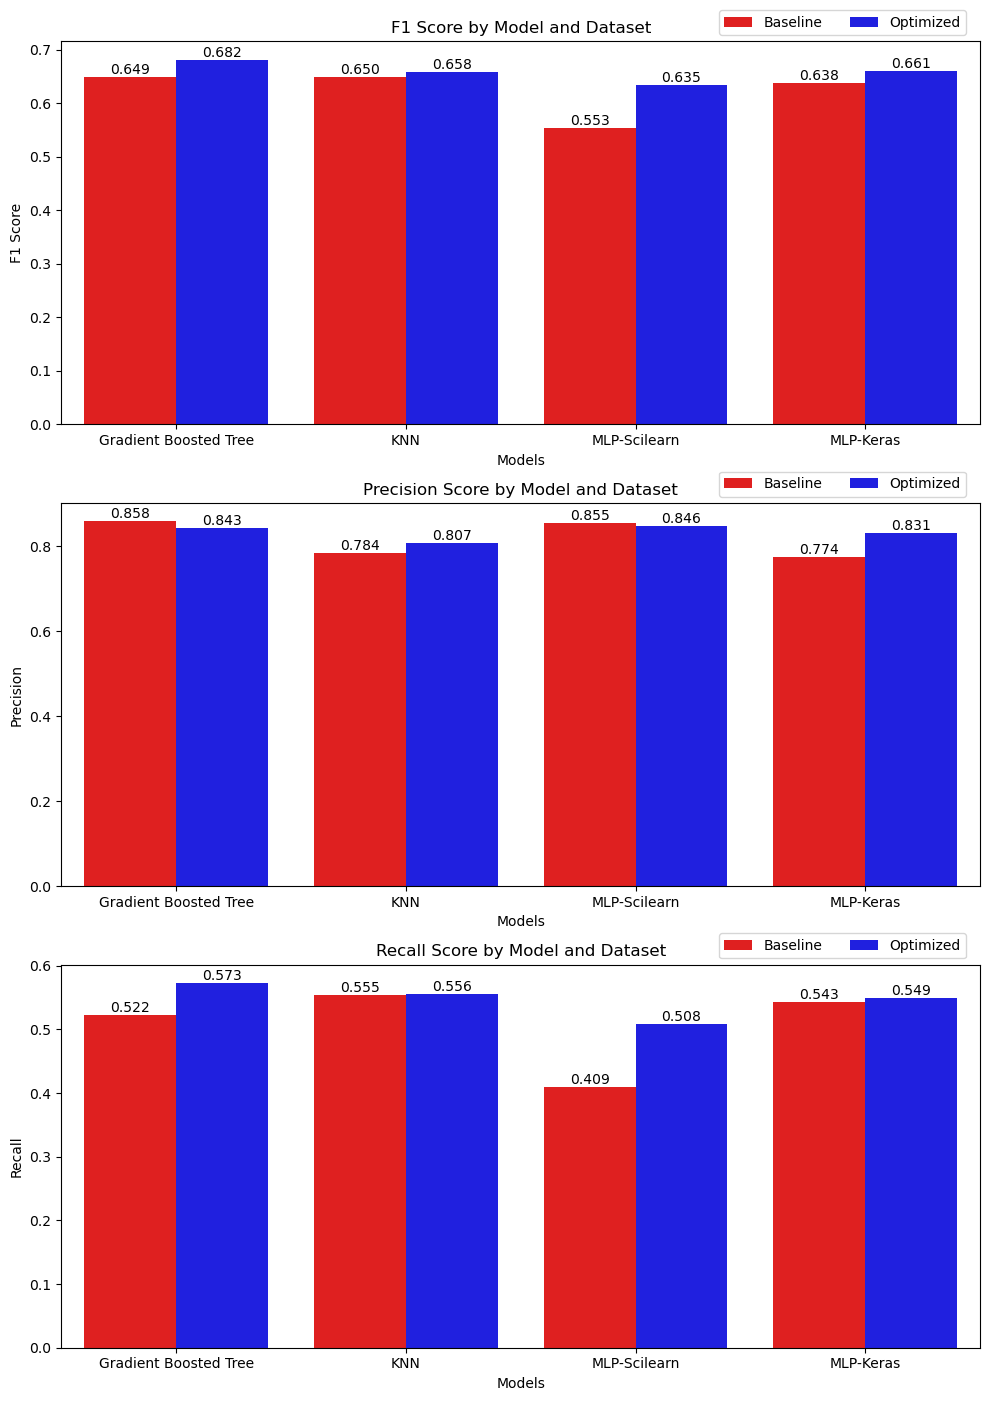

In [143]:
# Define the data
baseline_data = {
    'Model': ['Gradient Boosted Tree', 'KNN', 'MLP-Scilearn', 'MLP-Keras'],
    'F1 Score': [0.649365, 0.649506, 0.553319, 0.638309],
    'Precision': [0.858394, 0.783563, 0.855153, 0.774051],
    'Recall': [0.522202, 0.554618, 0.408970, 0.543073]
}

optimized_data = {
    'Model': ['Gradient Boosted Tree', 'KNN', 'MLP-Scilearn', 'MLP-Keras'],
    'F1 Score': [0.681998, 0.658428, 0.635229, 0.661321],
    'Precision': [0.842587, 0.807221, 0.846268, 0.830759],
    'Recall': [0.572824, 0.555950, 0.508437, 0.549290]
}

# Convert to pandas dataframe and add 'Dataset' column
baseline_df = pd.DataFrame(baseline_data)
baseline_df['Dataset'] = 'Baseline'
optimized_df = pd.DataFrame(optimized_data)
optimized_df['Dataset'] = 'Optimized'

# Concatenate the two dataframes
data = pd.concat([baseline_df, optimized_df])

# Set the palette for the two datasets
palette = {'Baseline': 'red', 'Optimized': 'blue'}


# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

# Plot F1 Score
sns.barplot(ax=axes[0], x='Model', y='F1 Score', hue='Dataset', data=data, palette=palette)
axes[0].set_title('F1 Score by Model and Dataset')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('F1 Score')

for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Plot Precision
sns.barplot(ax=axes[1], x='Model', y='Precision', hue='Dataset', data=data, palette=palette)
axes[1].set_title('Precision Score by Model and Dataset')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Precision')

for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Plot Recall
sns.barplot(ax=axes[2], x='Model', y='Recall', hue='Dataset', data=data, palette=palette)
axes[2].set_title('Recall Score by Model and Dataset')
axes[2].set_xlabel('Models')
axes[2].set_ylabel('Recall')

for p in axes[2].patches:
    height = p.get_height()
    axes[2].annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Adjust the spacing between subplots
plt.tight_layout()

# Move the legend outside the plot
axes[0].legend(loc='upper center', bbox_to_anchor=(0.85, 1.1), ncol=2)
axes[1].legend(loc='upper center', bbox_to_anchor=(0.85, 1.1), ncol=2)
axes[2].legend(loc='upper center', bbox_to_anchor=(0.85, 1.1), ncol=2)

# Display the plot
plt.show()


In [62]:
print('TABLE CONTAINING THE CONFUSION METRICS RESULTS FOR THE FOUR MODELS\n')

cm_df1

TABLE CONTAINING THE CONFUSION METRICS RESULTS FOR THE FOUR MODELS



,Model,True Positive,True Negative,False Positive,False Negative
0,Gradient Boosted Tree,1290,386510,241,962
1,KNN,1252,386452,299,1000
2,MLP-Scilearn,1145,386543,208,1107
3,MLP-Keras,1237,386499,252,1015


**DETAILS OF THE CONFUSION MATRIX RESULTS OF ALL THE MODELS**

In the realm of confusion matrix results, we consider several metrics, including true positives (correctly identified fraud cases), true negatives (correctly identified non-fraud cases), false positives (non-fraud cases incorrectly flagged as fraud), and false negatives (fraud cases missed by the models).

Comparing the baseline model results with the optimized models, we can observe the following:

True Positives: All optimized models, with the exception of the KNN model, show an increase in true positives. This suggests that the optimization has contextualised the models, allowing them to more accurately identify fraudulent transactions. The Gradient Boosted Tree model shows the most significant improvement in this area.

True Negatives: The true negatives have decreased slightly in all models. This decrease suggests that in enhancing our models' sensitivity to fraud, we may have slightly compromised their ability to correctly identify non-fraudulent transactions. However, the number of true negatives remains high, which is a good sign overall.

False Positives: In our optimization process, the number of false positives has slightly increased in all models. An increase in false positives can be a consequence of improving the models' sensitivity to detect fraud cases. While it is essential to keep this number as low as possible to avoid false alarms, a slight increase may be an acceptable trade-off for improved detection of actual fraud cases.

False Negatives: There's a notable decrease in false negatives across all optimized models, especially in the Gradient Boosted Tree model. This improvement is significant as it indicates that our optimized models are better at identifying fraud cases that were previously missed, hence increasing the overall model's effectiveness.

In conclusion, despite some trade-offs, the optimized models show clear improvements, especially in increasing the identification of fraudulent transactions (true positives) and decreasing missed fraud cases (false negatives). These are crucial areas in fraud detection where improved performance is highly beneficial.

**INSIGHTS**:

Taking both evaluation metrics and confusion matrix metrics into consideration, it seems the "Gradient Boosted Tree" model stands out both in the baseline and optimized models.

From the evaluation metrics perspective, in the optimized models, the "**Gradient Boosted Tree**" model had the highest F1 score (0.681998), and while it didn't have the highest precision, it had a very competitive precision score (0.842587) and the highest recall score (0.572824).

When we turn our attention to the confusion matrix, the "Gradient Boosted Tree" model again shows strong performance. It has the highest number of True Positives (1290) among all optimized models, meaning it was the best at identifying actual fraud cases. Furthermore, it showed a significant reduction in False Negatives, from 1076 in the baseline model to 962 in the optimized model.

Therefore, looking at both types of metrics, the "Gradient Boosted Tree" model appears to be the best performing model among the four we've evaluated in both baseline and optimized scenarios.




Below, you will find a series of comparative plots that visually articulate the performance of our baseline and optimized models in terms of the confusion matrix. Each graph presents a specific component of the confusion matrix - True Positives, True Negatives, False Positives, and False Negatives - allowing us to examine how the models have improved after optimization. These visual representations provide a quick and effective way to assess model performance in correctly and incorrectly identifying fraud cases, and illustrate the enhancements achieved through the optimization process. By comparing these metrics, we gain insights into the effectiveness of our models in classifying true fraud cases and avoiding false alarms.

In [135]:


# Baseline models
baseline_data = pd.DataFrame({
    "Model": ["Gradient Boosted Tree", "KNN", "MLP-Scilearn", "MLP-Keras"],
    "True Positive": [1176, 1249, 921, 1223],
    "True Negative": [386557, 386406, 386595, 386394],
    "False Positive": [194, 345, 156, 357],
    "False Negative": [1076, 1003, 1331, 1029],
    "Dataset": ["Baseline"]*4
})

# Optimized models
optimized_data = pd.DataFrame({
    "Model": ["Gradient Boosted Tree", "KNN", "MLP-Scilearn", "MLP-Keras"],
    "True Positive": [1290, 1252, 1145, 1237],
    "True Negative": [386510, 386452, 386543, 386499],
    "False Positive": [241, 299, 208, 252],
    "False Negative": [962, 1000, 1107, 1015],
    "Dataset": ["Optimized"]*4
})

# Combine the two datasets
data = pd.concat([baseline_data, optimized_data])


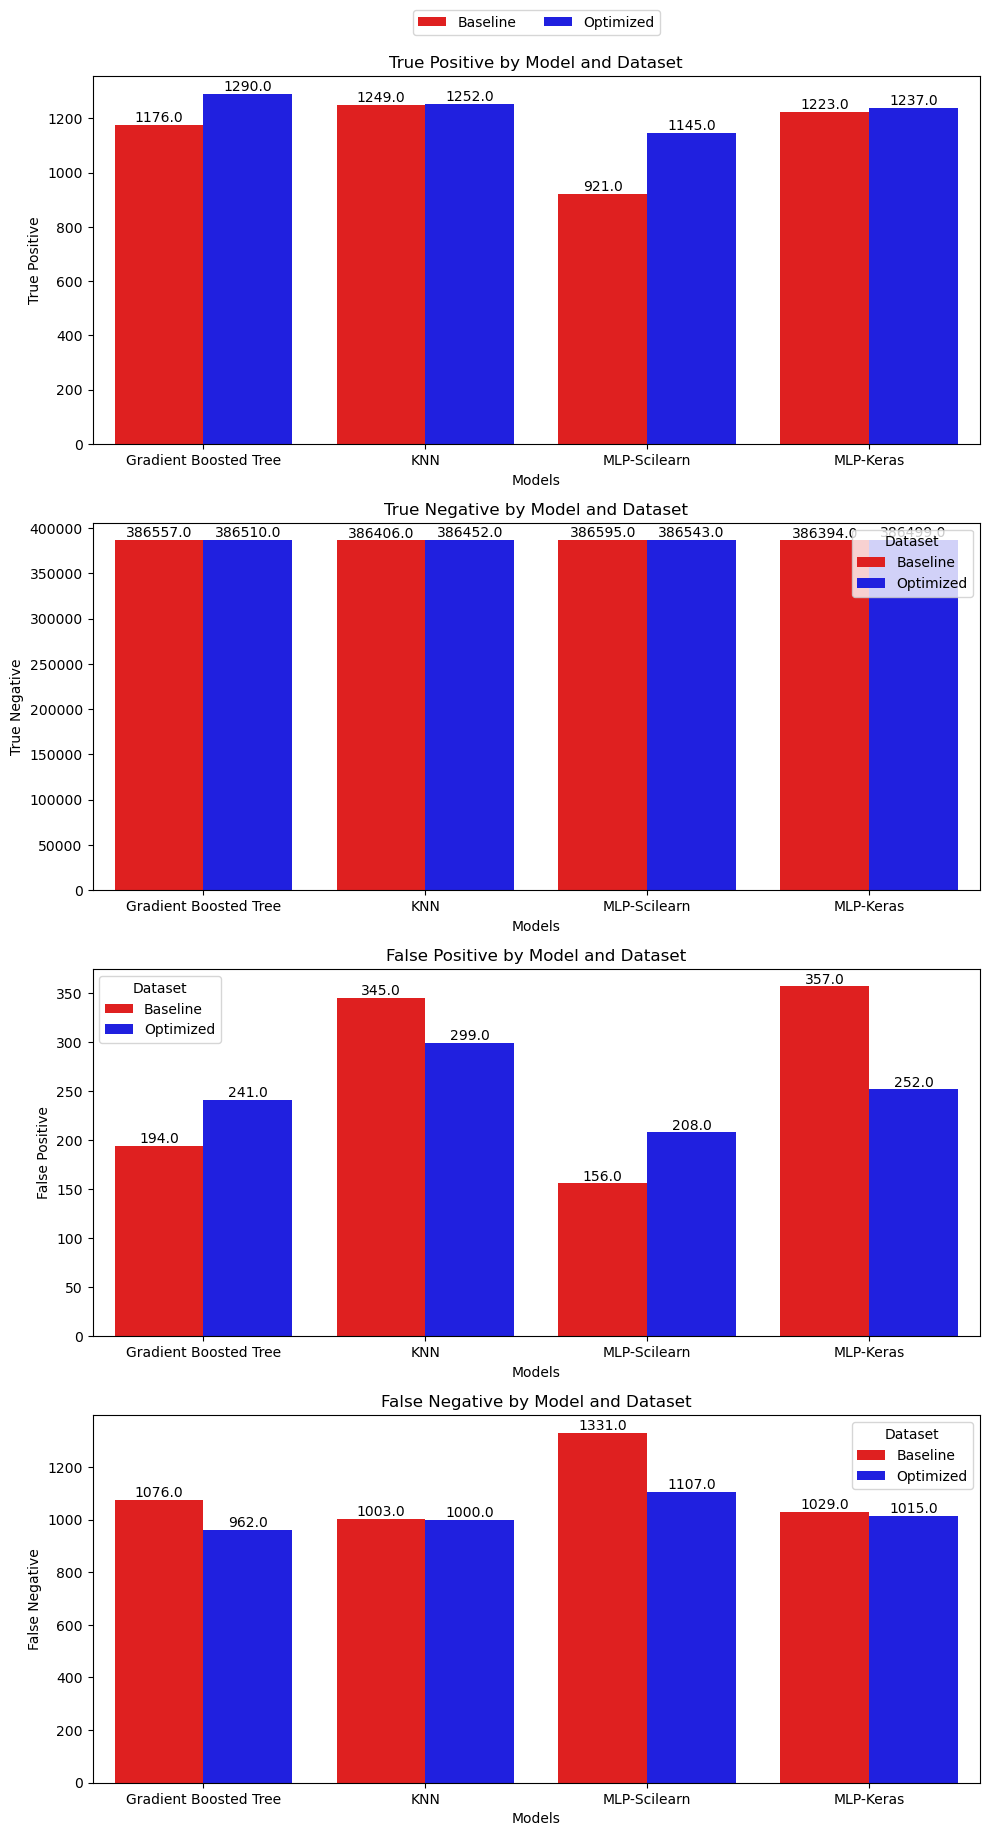

In [136]:
# Set the palette for the two datasets
palette = {'Baseline': 'red', 'Optimized': 'blue'}

# Create a figure with four subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

# Plot True Positive
sns.barplot(ax=axes[0], x='Model', y='True Positive', hue='Dataset', data=data, palette=palette)
axes[0].set_title('True Positive by Model and Dataset')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('True Positive')

for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Plot True Negative
sns.barplot(ax=axes[1], x='Model', y='True Negative', hue='Dataset', data=data, palette=palette)
axes[1].set_title('True Negative by Model and Dataset')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('True Negative')

for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Plot False Positive
sns.barplot(ax=axes[2], x='Model', y='False Positive', hue='Dataset', data=data, palette=palette)
axes[2].set_title('False Positive by Model and Dataset')
axes[2].set_xlabel('Models')
axes[2].set_ylabel('False Positive')

for p in axes[2].patches:
    height = p.get_height()
    axes[2].annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Plot False Negative
sns.barplot(ax=axes[3], x='Model', y='False Negative', hue='Dataset', data=data, palette=palette)
axes[3].set_title('False Negative by Model and Dataset')
axes[3].set_xlabel('Models')
axes[3].set_ylabel('False Negative')

for p in axes[3].patches:
    height = p.get_height()
    axes[3].annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Adjust the spacing between subplots
plt.tight_layout()

# Move the legend outside the plot
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

# Display the plot
plt.show()


**RANDOMLY UNDERSAMPLING THE DATASET**


- **INTRODUCTION TO RANDOM UNDER-SAMPLING**

In the face of imbalanced datasets, which we have seen in our case, conventional machine learning models often tend to favor the majority class, resulting in inadequate performance. In our instance, the Gradient Boosted Tree model achieved the highest F1 score of 0.681998, yet this is not quite sufficient for our needs.

As we continue with our study, we will explore the application of a technique known as random under-sampling to mitigate the issues caused by our imbalanced dataset. This technique works by randomly eliminating instances from the majority class to equalize the number of instances in all classes.

We aim to apply this under-sampling process to our dataset and then reassess the performance of our four chosen machine learning models. The ultimate goal is to compare the performance of our models on the under-sampled data with that on the original imbalanced dataset. This will provide us with insights into whether our models perform better on a balanced dataset and how much improvement, if any, we gain.

Additionally, we will carry out optimization steps on these algorithms for the under-sampled dataset, aiming to further improve their performance. This endeavor seeks to bring us closer to our goal of achieving a more accurate and reliable model for fraud detection.

In [64]:
#Creating a backup of the imbalanced dataset.
#Random undersampling would be done using the backed up dataframe.
dv=df_copy

The code below performs random undersampling to balance the skewed class distribution in a dataset. The process involves separating the dataset into fraudulent (minority class) and non-fraudulent (majority class) transactions. The majority class is then undersampled without replacement to a ratio of 3:1 with the minority class. This ratio is chosen to mitigate the disadvantages of undersampling.

Undersampling can lead to loss of information if the majority class is reduced too much. By selecting a 3:1 ratio, we aim to retain more information from the majority class while still addressing the imbalance in the dataset. This strategy also helps to avoid the potential pitfall of the models overfitting to the minority class, which could happen if a more extreme undersampling ratio was chosen.

A new dataset is then created by combining the undersampled non-fraudulent transactions with the original fraudulent transactions. This random undersampling helps to improve the performance of the machine learning models that are learning from the dataset by providing a more balanced class distribution for the models to learn from.

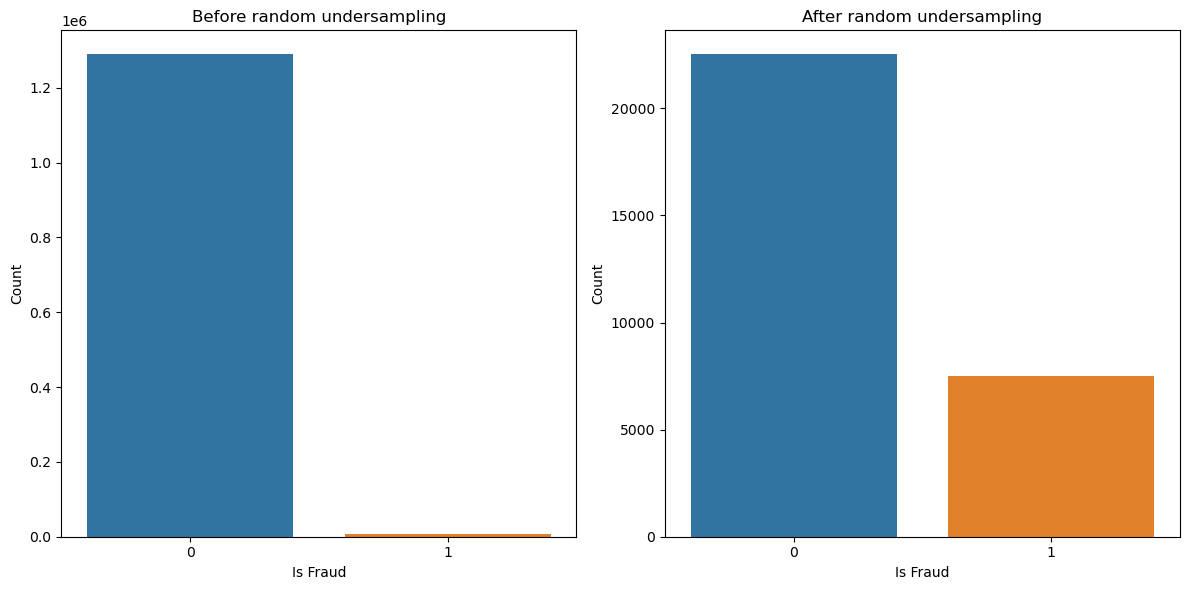

In [65]:
# Separate majority and minority classes
df_majority = dv[dv.is_fraud==0]  # Select all rows with is_fraud==0, i.e., non-fraudulent transactions
df_minority = dv[dv.is_fraud==1]  # Select all rows with is_fraud==1, i.e., fraudulent transactions

# Random undersampling majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # Sample without replacement
                                   n_samples=3*len(df_minority),  # Undersample majority class in the ratio 3:1
                                   random_state=42)  # Set random seed for reproducibility


# Concatenate minority class and downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Plot before and after
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Before
sns.countplot(x='is_fraud', data=df, ax=axs[0])  # Plot the count of fraudulent and non-fraudulent transactions in the original dataset
axs[0].set_title('Before random undersampling')
axs[0].set_xlabel('Is Fraud')
axs[0].set_ylabel('Count')

# After
sns.countplot(x='is_fraud', data=df_balanced, ax=axs[1])  # Plot the count of fraudulent and non-fraudulent transactions in the balanced dataset
axs[1].set_title('After random undersampling')
axs[1].set_xlabel('Is Fraud')
axs[1].set_ylabel('Count')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()  # Display the plot


- **SHAPE OF THE UNDERSAMPLED DATASET**

In [66]:
#The name of the new dataframe after undersampling is 'df_balanced'
#The code below shows the shape of the undersampled dataset

df_balanced.shape

(30024, 6)

In [69]:
#Creating a back up

df_sampled = df_balanced

In [70]:
df_sampled

,is_fraud,scaled_street,scaled_dob,scaled_trans_time,scaled_age,scaled_amt_transformed
811778,0,-0.436673,-0.595156,-0.281609,0.625000,0.276480
1101718,0,-0.454631,0.128697,-0.085171,-0.125000,0.274429
800013,0,0.058601,-1.225918,-0.613418,1.250000,0.342230
398945,0,1.015123,-0.145664,0.399423,0.166667,-0.056345
207455,0,-0.948015,0.456971,0.508094,-0.458333,-1.122080
...,...,...,...,...,...,...
1295399,1,-0.422495,0.425382,-1.147340,-0.416667,1.403928
1295491,1,-0.422495,0.425382,-1.069566,-0.416667,1.503595
1295532,1,0.510397,0.754214,-1.035589,-0.791667,-0.712695
1295666,1,0.046314,-0.253042,-0.934606,0.250000,-0.364190


- **Correlation of the Features in both datasets**.

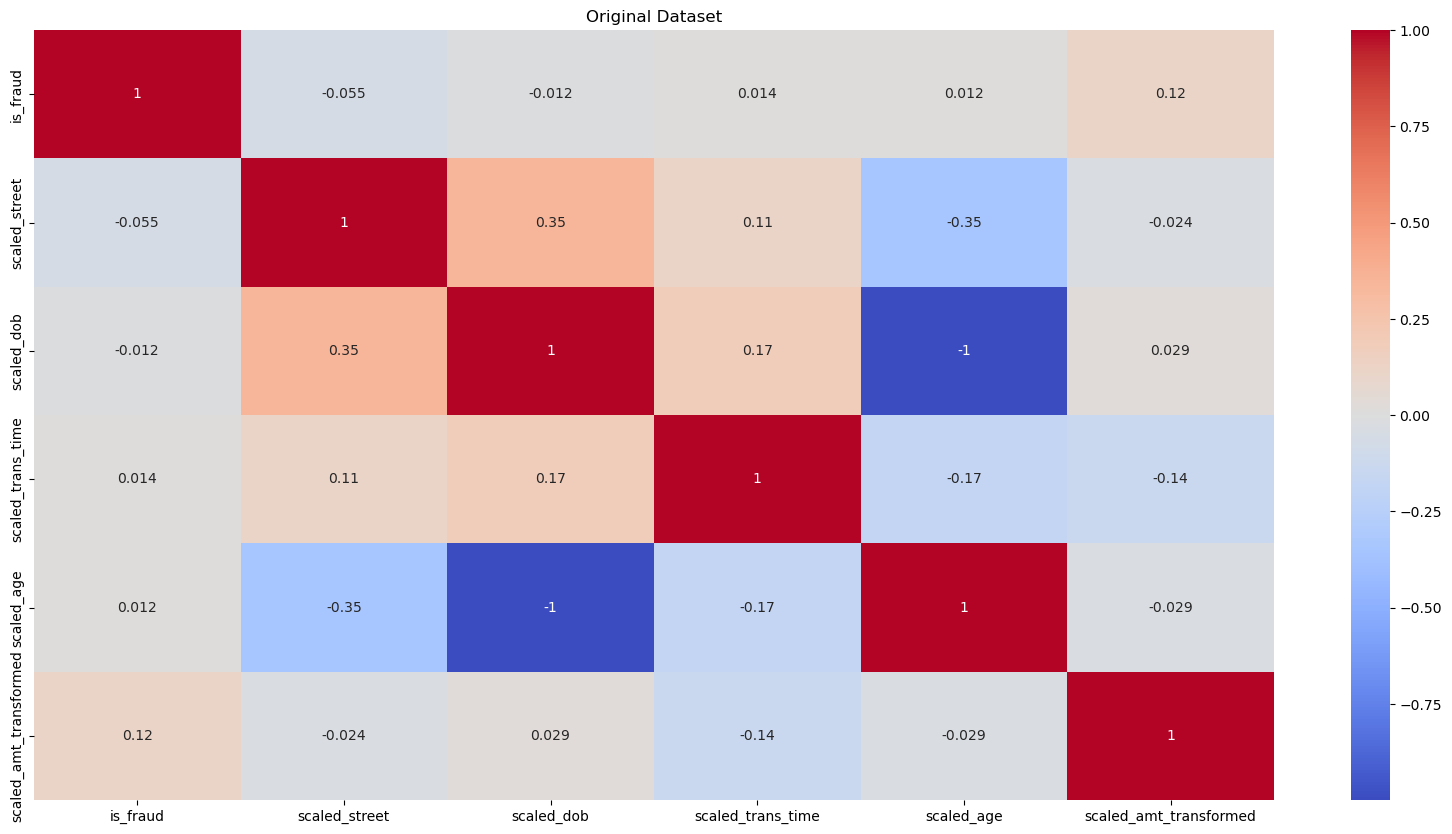

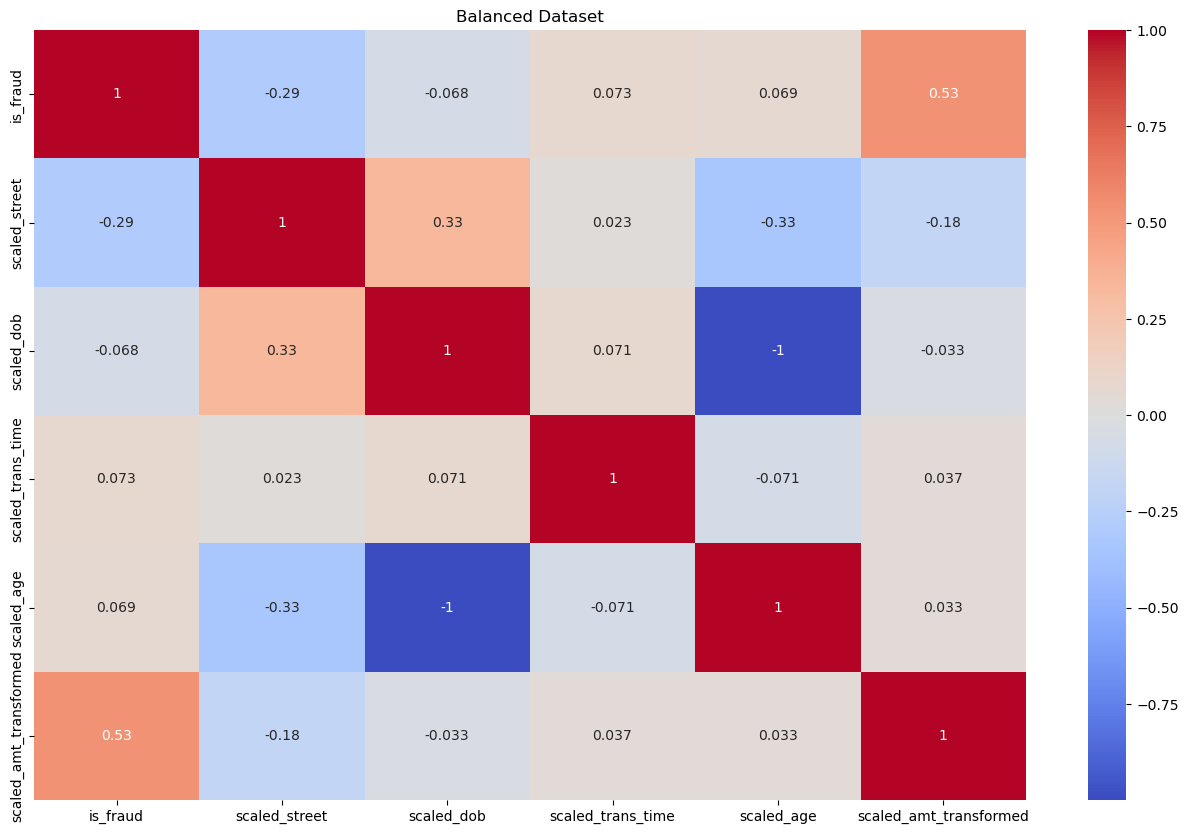

In [71]:
# Compute correlation matrix and plot heatmap for original dataset
corr_matrix = df_copy.corr()  # Compute the correlation matrix of the features in the original dataset
fig, ax = plt.subplots(figsize=(20,10))  # Create a figure and axis object for the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)  # Create a heatmap plot of the correlation matrix with annotations
ax.set_title('Original Dataset')
plt.show()  # Display the plot

# Compute correlation matrix and plot heatmap for balanced dataset
corr_matrix_balanced = df_sampled.corr()  # Compute the correlation matrix of the features in the balanced dataset
plt.figure(figsize=(16, 10))  # Create a figure object for the plot
sns.heatmap(corr_matrix_balanced, annot=True, cmap='coolwarm')  # Create a heatmap plot of the correlation matrix with annotations
plt.title('Balanced Dataset')
plt.show()  # Display the plot



This code creates heatmap plots of the correlation matrix of the features in both the original dataset and the balanced dataset. The original dataset contains all the samples, while the balanced dataset is created by randomly undersampling the majority class to match the number of samples in the minority class.


The purpose of comparing the two plots is to observe any differences in the correlation structure of the features before and after balancing the dataset. Specifically, we want to identify if any highly correlated features that were present in the original dataset were removed or reduced in the balanced dataset.

In general, we would expect the balanced dataset to have a reduced correlation structure compared to the original dataset, since random undersampling tends to remove some of the variability and patterns in the data. 


**MACHINE LEARNING**

**SPLITTING THE DATASET INTO TRAIN AND VALIDATION SETS**

In [72]:
#Creating Train and Validation sets from the Sampled Dataset


X = df_sampled.drop('is_fraud', axis=1)  # Create a new dataframe `X` that contains all the columns from the balanced dataset except 
                                        #for the `is_fraud` column, which is the target variable
y = df_sampled['is_fraud']  # Create a new dataframe `y` that contains only the `is_fraud` column, which is the target variable

# Split the data into train and validation sets using the `train_test_split` function from scikit-learn
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Print the number of samples in the training and validation sets
print('Number of samples in training set:', len(X_train))
print('Number of samples in validation set:', len(X_val))



Number of samples in training set: 24019
Number of samples in validation set: 6005


This code splits the Balanced dataset into a training set (80%) and a validation set (20%), using the train_test_split() function from the scikit-learn library. The random_state parameter is set to ensure reproducibility of the split.  It prepares the data for model training and evaluation. 

**BASELINE ALGORITHMS APPLIED ON THE RANDOMLY UNDERSAMPLED DATASET**

- **GRADIENT BOOSTED TREE**

In [73]:
#Baseline Algorithm for Gradient Boost Tree for the Sampled Dataset

# Create an instance of the Gradient Boosted Trees model
gbc_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gbc_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = gbc_model.predict(X_val)

# Compute the f1 score, precision, and recall using the 'weighted' average
f1_gbt3 = f1_score(y_val, y_pred)
precision_gbt3 = precision_score(y_val, y_pred)
recall_gbt3 = recall_score(y_val, y_pred)


# Print the evaluation metrics
print("F1 Score: ", f1_gbt3)
print("Precision: ", precision_gbt3)
print("Recall: ", recall_gbt3)


# Generate the confusion matrix
cm_gbt3 = confusion_matrix(y_val, y_pred)


# Store the results as a dictionary
cm_gbt3_dict = {'True Positive': cm_gbt3[1][1], 'True Negative': cm_gbt3[0][0], 'False Positive': cm_gbt3[0][1], 'False Negative': cm_gbt3[1][0]}

# Print the dictionary
print(cm_gbt3_dict)




F1 Score:  0.8992299966521594
Precision:  0.919233401779603
Recall:  0.8800786369593709
{'True Positive': 1343, 'True Negative': 4361, 'False Positive': 118, 'False Negative': 183}


- **K-NEAREST NEIGHBORS**

In [75]:
#Baseline KNN model for Sampled Dataset

# Create an instance of the KNN model
knn_model = KNeighborsClassifier()

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = knn_model.predict(X_val)

# Compute the f1 score, precision, and recall using the 'weighted' average
f1_knn3 = f1_score(y_val, y_pred)
precision_knn3 = precision_score(y_val, y_pred)
recall_knn3 = recall_score(y_val, y_pred)


# Print the evaluation metrics
print("F1 Score: ", f1_knn3)
print("Precision: ", precision_knn3)
print("Recall: ", recall_knn3)


# Generate the confusion matrix
cm_knn3 = confusion_matrix(y_val, y_pred)


# Store the results as a dictionary
cm_knn3_dict = {'True Positive': cm_knn3[1][1], 'True Negative': cm_knn3[0][0], 'False Positive': cm_knn3[0][1], 'False Negative': cm_knn3[1][0]}

# Print the dictionary
print(cm_knn3_dict)




F1 Score:  0.8849379402884938
Precision:  0.9065292096219931
Recall:  0.86435124508519
{'True Positive': 1319, 'True Negative': 4343, 'False Positive': 136, 'False Negative': 207}


- **MLP USING  SCIKIT-LEARN**

In [76]:
#Baseline Algorithm for MLP Neural Network with Scikit Learn

# Define the input and output dimensions
input_dim = X_train.shape[1]
output_dim = 1

# Create a sequential model
model = Sequential()

# Add a dense layer with 64 units, ReLU activation function, and input dimension equal to the number of features
model.add(Dense(64, activation='relu', input_dim=input_dim))

# Add a dense layer with 32 units and ReLU activation function
model.add(Dense(32, activation='relu'))

# Add a dense layer with 1 unit and sigmoid activation function (for binary classification)
model.add(Dense(output_dim, activation='sigmoid'))

# Compile the model using binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data for 10 epochs
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Create an instance of the MLPClassifier model
mlp_model1 = MLPClassifier(random_state=42)

# Fit the model to the training data
mlp_model1.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = mlp_model1.predict(X_val)

# Compute the f1 score, precision, and recall using the 'weighted' average
f1_mlp_scilearn3 = f1_score(y_val, y_pred)
precision_mlp_scilearn3 = precision_score(y_val, y_pred)
recall_mlp_scilearn3 = recall_score(y_val, y_pred)


# Print the evaluation metrics
print("F1 Score: ", f1_mlp_scilearn3)
print("Precision: ", precision_mlp_scilearn3)
print("Recall: ", recall_mlp_scilearn3)

# Generate the confusion matrix
cm_mlp_scilearn3 = confusion_matrix(y_val, y_pred)


# Store the results as a dictionary
cm_mlp_scilearn3_dict = {'True Positive': cm_mlp_scilearn3[1][1], 'True Negative': cm_mlp_scilearn3[0][0], 'False Positive': cm_mlp_scilearn3[0][1], 'False Negative': cm_mlp_scilearn3[1][0]}

# Print the dictionary
print(cm_mlp_scilearn3_dict)



Epoch 1/10
751/751 [==============================] - 1s 1ms/step - loss: 0.3086 - accuracy: 0.8977 - val_loss: 0.2148 - val_accuracy: 0.9226
Epoch 2/10
751/751 [==============================] - 1s 1ms/step - loss: 0.2001 - accuracy: 0.9251 - val_loss: 0.1804 - val_accuracy: 0.9341
Epoch 3/10
751/751 [==============================] - 1s 1ms/step - loss: 0.1781 - accuracy: 0.9316 - val_loss: 0.1714 - val_accuracy: 0.9359
Epoch 4/10
751/751 [==============================] - 1s 1ms/step - loss: 0.1698 - accuracy: 0.9371 - val_loss: 0.1764 - val_accuracy: 0.9352
Epoch 5/10
751/751 [==============================] - 1s 1ms/step - loss: 0.1650 - accuracy: 0.9379 - val_loss: 0.1631 - val_accuracy: 0.9389
Epoch 6/10
751/751 [==============================] - 1s 1ms/step - loss: 0.1619 - accuracy: 0.9389 - val_loss: 0.1613 - val_accuracy: 0.9417
Epoch 7/10
751/751 [==============================] - 1s 1ms/step - loss: 0.1599 - accuracy: 0.9392 - val_loss: 0.1630 - val_accuracy: 0.9425
Epoch 

- **MLP USING KERAS**

In [78]:
from keras.models import Sequential
from keras.layers import Dense

#Baseline Algorithm for MLP Neural Network with Keras

# Define the input and output dimensions
input_dim = X_train.shape[1]
output_dim = 1

# Create a sequential model
model = Sequential()

# Add a dense layer with 64 units, ReLU activation function, and input dimension equal to the number of features
model.add(Dense(64, activation='relu', input_dim=input_dim))

# Add a dense layer with 32 units and ReLU activation function
model.add(Dense(32, activation='relu'))

# Add a dense layer with 16 units and ReLU activation function
model.add(Dense(16, activation='relu'))

# Add a dense layer with 1 unit and sigmoid activation function (for binary classification)
model.add(Dense(output_dim, activation='sigmoid'))

# Compile the model using binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data for 10 epochs
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_val)

# Compute the f1 score, precision, and recall using the 'weighted' average
y_pred_binary = (y_pred > 0.5).astype(int)


f1_mlp_keras3 = f1_score(y_val, y_pred_binary, average='binary')
precision_mlp_keras3 = precision_score(y_val, y_pred_binary, average='binary')
recall_mlp_keras3 = recall_score(y_val, y_pred_binary, average='binary')


# Print the evaluation metrics
print("F1 Score: ", f1_mlp_keras3)
print("Precision: ", precision_mlp_keras3)
print("Recall: ", recall_mlp_keras3)


# Get the predicted labels as binary values
y_pred_binary = (y_pred > 0.5).astype(int)

# Get the confusion matrix
cm_mlp_keras3 = confusion_matrix(y_val, y_pred_binary)


# Store the results as a dictionary
cm_mlp_keras3_dict = {'True Positive': cm_mlp_keras3[1][1], 'True Negative': cm_mlp_keras3[0][0], 'False Positive': cm_mlp_keras3[0][1], 'False Negative': cm_mlp_keras3[1][0]}

# Print the dictionary
print(cm_mlp_keras3_dict)


Epoch 1/10
751/751 [==============================] - 1s 1ms/step - loss: 0.2880 - accuracy: 0.9035 - val_loss: 0.1882 - val_accuracy: 0.9342
Epoch 2/10
751/751 [==============================] - 1s 1ms/step - loss: 0.1793 - accuracy: 0.9318 - val_loss: 0.1709 - val_accuracy: 0.9356
Epoch 3/10
751/751 [==============================] - 1s 1ms/step - loss: 0.1668 - accuracy: 0.9377 - val_loss: 0.1615 - val_accuracy: 0.9407
Epoch 4/10
751/751 [==============================] - 1s 1ms/step - loss: 0.1610 - accuracy: 0.9403 - val_loss: 0.1616 - val_accuracy: 0.9409
Epoch 5/10
751/751 [==============================] - 1s 1ms/step - loss: 0.1571 - accuracy: 0.9405 - val_loss: 0.1613 - val_accuracy: 0.9430
Epoch 6/10
751/751 [==============================] - 1s 1ms/step - loss: 0.1543 - accuracy: 0.9409 - val_loss: 0.1603 - val_accuracy: 0.9404
Epoch 7/10
751/751 [==============================] - 1s 1ms/step - loss: 0.1523 - accuracy: 0.9423 - val_loss: 0.1526 - val_accuracy: 0.9452
Epoch 

**COMPARATIVE ANALYSIS OF THE BASELINE ON THE UNDERSAMPLED DATASET**

In [79]:
metrics_dict2 = {
    'Model': ['Gradient Boosted Tree', 'KNN', 'MLP-Scilearn', 'MLP-Keras'],
    'F1 Score': [f1_gbt3, f1_knn3, f1_mlp_scilearn3, f1_mlp_keras3],
    'Precision': [precision_gbt3, precision_knn3, precision_mlp_scilearn3, precision_mlp_keras3],
    'Recall': [recall_gbt3, recall_knn3, recall_mlp_scilearn3, recall_mlp_keras3]
}

# Convert the metrics dictionary to a Pandas DataFrame
metrics_df2 = pd.DataFrame(metrics_dict2)

# Store the confusion matrix values in a dictionary
cm_dict2 = {
    'Model': ['Gradient Boosted Tree', 'KNN', 'MLP-Scilearn', 'MLP-Keras'],
    'True Positive': [cm_gbt3[1][1], cm_knn3[1][1], cm_mlp_scilearn3[1][1], cm_mlp_keras3[1][1]],
    'True Negative': [cm_gbt3[0][0], cm_knn3[0][0], cm_mlp_scilearn3[0][0], cm_mlp_keras3[0][0]],
    'False Positive': [cm_gbt3[0][1], cm_knn3[0][1], cm_mlp_scilearn3[0][1], cm_mlp_keras3[0][1]],
    'False Negative': [cm_gbt3[1][0], cm_knn3[1][0], cm_mlp_scilearn3[1][0], cm_mlp_keras3[1][0]]
}

# Convert the confusion matrix dictionary to a Pandas DataFrame
cm_df2 = pd.DataFrame(cm_dict2)

In [ ]:
print('TABLE OF THE EVALUATION METRICS FOR THE FOUR MODELS\n')

metrics_df2

,Model,F1 Score,Precision,Recall
0,Gradient Boosted Tree,0.899230,0.919233,0.880079
1,KNN,0.884938,0.906529,0.864351
2,MLP-Scilearn,0.886640,0.913769,0.861075
3,MLP-Keras,0.884865,0.924340,0.848624


**PERFORMANCE OF BASELINE MODELS ON THE RANDOMLY UNDERSAMPLED DATASET: EVALUATION METRICS ANALYSIS**

This table displays the performance of four different machine learning models used in this fraud detection analysis. The models include Gradient Boosted Tree, K-Nearest Neighbors (KNN), Multi-Layer Perceptron (MLP) with scikit-learn, and MLP with Keras. The performance metrics used to evaluate these models are F1 Score, Precision, and Recall.

**Gradient Boosted Tree Model**: This model achieved the best F1 score of 0.899230, indicating a balanced performance of precision and recall. The precision is 0.919233, which means that it correctly classified 91.92% of the fraud cases, and the recall is 0.880079, implying that it identified 88% of the total actual fraud cases.

**K-Nearest Neighbors (KNN) Model**: The F1 score is 0.884938, which is lower than the Gradient Boosted Tree model. The precision and recall are also slightly lower at 0.906529 and 0.864351 respectively.

**MLP-Scilearn Model**: The F1 score for this model is 0.886640, slightly higher than KNN but lower than the Gradient Boosted Tree. It has a precision of 0.913769 and a recall of 0.861075.

**MLP-Keras Model**: This model has the lowest F1 score of 0.884865 among all four models. It has the highest precision at 0.924340, but the lowest recall at 0.848624.

In summary, the Gradient Boosted Tree model performed best on the randomly undersampled dataset according to the F1 score. However, if we consider the precision metric (minimizing false positives), the MLP-Keras model performed best. The choice of the best model can vary depending on the specific requirements of the task.

In [ ]:
print('TABLE CONTAINING THE CONFUSION METRICS RESULTS FOR THE FOUR MODELS\n')
cm_df2

,Model,True Positive,True Negative,False Positive,False Negative
0,Gradient Boosted Tree,1343,4361,118,183
1,KNN,1319,4343,136,207
2,MLP-Scilearn,1314,4355,124,212
3,MLP-Keras,1295,4373,106,231


**EVALUATING BASELINE MODEL PERFORMANCE: A CONFUSION MATRIX PERSPECTIVE ON THE RANDOMLY UNDERSAMPLED DATASET**

The confusion matrix for each of the four machine learning models used in the fraud detection analysis - Gradient Boosted Tree, K-Nearest Neighbors (KNN), Multi-Layer Perceptron (MLP) with scikit-learn, and MLP with Keras - is presented here. The confusion matrix provides a clear visualization of the performance of these classification models, illustrating the counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

Gradient Boosted Tree: In this model, 1343 fraudulent transactions were correctly identified (True Positive) alongside 4361 non-fraudulent transactions (True Negative). Nevertheless, the model incorrectly classified 118 non-fraudulent transactions as fraudulent (False Positive) and overlooked 183 actual fraudulent transactions (False Negative).

KNN: The K-Nearest Neighbors model demonstrated accurate classification of 1319 fraudulent transactions (True Positive) and 4343 non-fraudulent transactions (True Negative). It misclassified 136 non-fraudulent transactions as fraudulent (False Positive) and failed to detect 207 actual fraud instances (False Negative).

MLP-Scilearn: The Multi-Layer Perceptron model implemented with scikit-learn correctly identified 1314 fraudulent transactions (True Positive) and 4355 non-fraudulent transactions (True Negative). It, however, misclassified 124 non-fraudulent transactions as fraudulent (False Positive) and missed detecting 212 actual fraudulent transactions (False Negative).

MLP-Keras: The Multi-Layer Perceptron model, implemented using Keras, correctly classified 1295 fraudulent transactions (True Positive) and 4373 non-fraudulent transactions (True Negative). Nevertheless, it labeled 106 non-fraudulent transactions as fraudulent (False Positive) and overlooked 231 actual fraudulent cases (False Negative).

In summary, these confusion matrices provide valuable insights into each model's performance in identifying fraudulent transactions when trained on a randomly undersampled dataset. The consideration of trade-offs between false positives and false negatives is essential in the context of fraud detection, given their different implications. With further optimization, feature engineering, and exploration of alternative algorithms or model architectures, the performance of these models could potentially be enhanced.

***INSIGHTS***: **Comparative Analysis and Conclusion of Model Performances**

In the comparative analysis of the models trained on the randomly undersampled dataset, the following insights can be drawn:

The Gradient Boosted Tree model showed superior performance in terms of F1 score (0.899230), Precision (0.919233), and Recall (0.880079). This suggests that this model was most effective in the balanced identification of fraudulent and non-fraudulent transactions.

The K-Nearest Neighbors (KNN) model, the Multi-Layer Perceptron (MLP) model with scikit-learn, and the MLP model with Keras also performed reasonably well, but their F1 scores, Precision, and Recall were slightly lower than those of the Gradient Boosted Tree model.

The confusion matrices provide a comprehensive understanding of each model's performance. They highlight the number of True Positives (actual fraudulent transactions correctly identified), True Negatives (actual non-fraudulent transactions correctly identified), False Positives (non-fraudulent transactions incorrectly classified as fraudulent), and False Negatives (fraudulent transactions that were not detected).

In the context of fraud detection, it is critical to strike a balance between detecting as many fraudulent transactions as possible (high True Positive rate) and minimizing the number of non-fraudulent transactions that are incorrectly flagged as fraudulent (low False Positive rate).

In conclusion, while all the models showed a marked improvement in their performance when trained on the randomly undersampled dataset, the Gradient Boosted Tree model outperformed the others. Nevertheless, each model has its strengths and weaknesses, and the choice of model should ultimately depend on the specific objectives and constraints of the fraud detection system. Further fine-tuning of the models could potentially lead to even better performance.

**OPTIMIZED ALGORITHMS FOR THE RANDOMLY UNDERSAMPLED DATASET**

- **GRADIENT BOOSTED TREE**

RandomSearchCV and manual tuning was used to get the best hyperparameters for optimizing this model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform


#RANDOMSEARCHCV

# Define the hyperparameter space to search over
param_dist = {
     'subsample': uniform(0.5, 0.5),
     'n_estimators': range(50, 500, 50)
    
}

# Create an instance of the Gradient Boosted Trees model with L2 regularization
gbc_model = GradientBoostingClassifier(random_state=42)

# Create an instance of RandomizedSearchCV with 10-fold cross validation
rs_cv = RandomizedSearchCV(gbc_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the RandomizedSearchCV model to the training data
rs_cv.fit(X_train, y_train)

# Use the best model to make predictions on the test data
y_pred = rs_cv.predict(X_val)

# Compute the f1 score, precision, and recall using the 'weighted' average
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)

# Print the evaluation metrics
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
# Print the best hyperparameters
print("Best Hyperparameters: ", rs_cv.best_params_)


F1 Score:  0.8991624790619765
Precision:  0.9198080877313228
Recall:  0.8794233289646134
Best Hyperparameters:  {'n_estimators': 250, 'subsample': 0.8087407548138583}


OPTIMIZED

In [94]:
#Optimized Algorithm for Gradient Boost Tree for the Sampled Dataset

# Create an instance of the Gradient Boosted Trees model
gbc_model = GradientBoostingClassifier(random_state=42, 
                                        learning_rate=0.08799726016810132, n_estimators=500, 
                                        max_depth= 6, min_samples_split=2,
                                        min_samples_leaf= 4, max_features='log2')

# Fit the model on the training data
gbc_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = gbc_model.predict(X_val)

# Compute the f1 score, precision, and recall using the 'weighted' average
f1_gbt4 = f1_score(y_val, y_pred)
precision_gbt4 = precision_score(y_val, y_pred)
recall_gbt4 = recall_score(y_val, y_pred)


# Print the evaluation metrics
print("F1 Score: ", f1_gbt4)
print("Precision: ", precision_gbt4)
print("Recall: ", recall_gbt4)


# Generate the confusion matrix
cm_gbt4 = confusion_matrix(y_val, y_pred)


# Store the results as a dictionary
cm_gbt4_dict = {'True Positive': cm_gbt4[1][1], 'True Negative': cm_gbt4[0][0], 'False Positive': cm_gbt4[0][1], 'False Negative': cm_gbt4[1][0]}

# Print the dictionary
print(cm_gbt4_dict)

F1 Score:  0.9100067159167226
Precision:  0.9331955922865014
Recall:  0.8879423328964613
{'True Positive': 1355, 'True Negative': 4382, 'False Positive': 97, 'False Negative': 171}


- **K-NEAREST NEIGHBOR**

BayeSearchCV and manual tuning was used to get the best hyperparameters for optimizing this model

In [91]:
# Define the hyperparameter search space
param_grid = {
    'n_neighbors': list(range(1, 50)),
    'weights': ['uniform', 'distance'],
    'p': (1, 2),
    #'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(1, 50))
}

# Create an instance of the KNN model
knn_model = KNeighborsClassifier()

# Create an instance of the BayesianSearchCV class
search = BayesSearchCV(
    estimator=knn_model,
    search_spaces=param_grid,
    n_iter=10,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", search.best_params_)
print("Best score:", search.best_score_)

# Use the best hyperparameters to make predictions on the test data
y_pred = search.predict(test_x)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: OrderedDict([('leaf_size', 40), ('n_neighbors', 9), ('p', 2), ('weights', 'uniform')])
Best score: 0.9960810062412329


OPTIMIZED

In [95]:
#Optimized KNN model for Sampled Dataset

# Create an instance of the KNN model
knn_model = KNeighborsClassifier(weights='distance', p=1, n_neighbors=6, leaf_size=1, algorithm='kd_tree')

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = knn_model.predict(X_val)

# Compute the f1 score, precision, and recall using the 'binary' average
f1_knn4 = f1_score(y_val, y_pred)
precision_knn4 = precision_score(y_val, y_pred)
recall_knn4 = recall_score(y_val, y_pred)

# Print the evaluation metrics
print("F1 Score: ", f1_knn4)
print("Precision: ", precision_knn4)
print("Recall: ", recall_knn4)

# Generate the confusion matrix
cm_knn4 = confusion_matrix(y_val, y_pred)


# Store the results as a dictionary
cm_knn4_dict = {'True Positive': cm_knn4[1][1], 'True Negative': cm_knn4[0][0], 'False Positive': cm_knn4[0][1], 'False Negative': cm_knn4[1][0]}

# Print the dictionary
print(cm_knn4_dict)


F1 Score:  0.8882943143812709
Precision:  0.907103825136612
Recall:  0.8702490170380078
{'True Positive': 1328, 'True Negative': 4343, 'False Positive': 136, 'False Negative': 198}


- **MLP WITH SCIKIT-LEARN**

GridSearchCV and manual tuning was used to get the best hyperparameters for optimizing this model

In [86]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(64, 32), (50, 50), (100,)],  # different layer sizes
    'activation': ['tanh', 'relu'],  # different activation functions
    'solver': ['sgd', 'adam'],  # different solvers
    'alpha': [0.0001, 0.05],  # different alpha values
    'learning_rate': ['constant', 'adaptive'],  # different learning rates
    'max_iter': [400, 600, 800]  # different max iterations
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Initialize the GridSearch object
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Fit the GridSearch object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters: ", best_params)

# Train the MLPClassifier with the best found parameters
mlp_best = MLPClassifier(**best_params)
mlp_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp_best.predict(X_val)

# Compute the f1 score, precision, and recall
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

# Print the evaluation metrics
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Store the results as a dictionary
cm_dict = {'True Positive': cm[1][1], 'True Negative': cm[0][0], 'False Positive': cm[0][1], 'False Negative': cm[1][0]}

# Print the dictionary
print(cm_dict)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'adam'}
F1 Score:  0.9042196918955124
Precision:  0.9246575342465754
Recall:  0.8846657929226737
{'True Positive': 1350, 'True Negative': 4369, 'False Positive': 110, 'False Negative': 176}


c:\ProgramData\Anaconda3\envs\lab_environment_dl1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


OPTIMIZED

In [129]:
#Optimized Model for MLP Scikit Learn 

# Define the input and output dimensions
input_dim = X_train.shape[1]
output_dim = 1

# Create a sequential model
model = Sequential()

# Add a dense layer with 64 units, ReLU activation function, and input dimension equal to the number of features
model.add(Dense(256, activation='tanh', input_dim=input_dim))

# Add a dense layer with 32 units and ReLU activation function
model.add(Dense(256, activation='tanh'))

# Add a dense layer with 1 unit and sigmoid activation function (for binary classification)
model.add(Dense(output_dim, activation='sigmoid'))

# Compile the model using binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data for 10 epochs
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Define the hyperparameters
hidden_layer_sizes = (50, 50)
activation = 'tanh'
solver = 'adam'
alpha = 0.001
learning_rate = 'constant'
max_iter = 400

# Create an instance of the MLPClassifier model with hyperparameters
mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
                          solver=solver, alpha=alpha, learning_rate=learning_rate,
                          max_iter=max_iter, random_state=42)



# Fit the model to the training data
mlp_model1.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = mlp_model1.predict(X_val)

# Compute the f1 score, precision, and recall using the 'weighted' average
f1_mlp_scilearn4 = f1_score(y_val, y_pred)
precision_mlp_scilearn4 = precision_score(y_val, y_pred)
recall_mlp_scilearn4 = recall_score(y_val, y_pred)


# Print the evaluation metrics
print("F1 Score: ", f1_mlp_scilearn4)
print("Precision: ", precision_mlp_scilearn4)
print("Recall: ", recall_mlp_scilearn4)

# Generate the confusion matrix
cm_mlp_scilearn4 = confusion_matrix(y_val, y_pred)


# Store the results as a dictionary
cm_mlp_scilearn4_dict = {'True Positive': cm_mlp_scilearn4[1][1], 'True Negative': cm_mlp_scilearn4[0][0], 'False Positive': cm_mlp_scilearn4[0][1], 'False Negative': cm_mlp_scilearn4[1][0]}

# Print the dictionary
print(cm_mlp_scilearn4_dict)

Epoch 1/10
751/751 [==============================] - 2s 3ms/step - loss: 0.3480 - accuracy: 0.8899 - val_loss: 0.2648 - val_accuracy: 0.9161
Epoch 2/10
751/751 [==============================] - 2s 3ms/step - loss: 0.2220 - accuracy: 0.9218 - val_loss: 0.1836 - val_accuracy: 0.9337
Epoch 3/10
751/751 [==============================] - 2s 3ms/step - loss: 0.1788 - accuracy: 0.9318 - val_loss: 0.1643 - val_accuracy: 0.9396
Epoch 4/10
751/751 [==============================] - 2s 2ms/step - loss: 0.1634 - accuracy: 0.9370 - val_loss: 0.1596 - val_accuracy: 0.9405
Epoch 5/10
751/751 [==============================] - 2s 2ms/step - loss: 0.1560 - accuracy: 0.9403 - val_loss: 0.1517 - val_accuracy: 0.9427
Epoch 6/10
751/751 [==============================] - 2s 2ms/step - loss: 0.1516 - accuracy: 0.9403 - val_loss: 0.1590 - val_accuracy: 0.9402
Epoch 7/10
751/751 [==============================] - 2s 2ms/step - loss: 0.1495 - accuracy: 0.9417 - val_loss: 0.1472 - val_accuracy: 0.9449
Epoch 

- **MLP with KERAS**

RandomSearchCV and manual tuning was used to get the best hyperparameters for optimizing this model

In [142]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Function to create the model with different hyperparameters
def create_model(activation='relu', optimizer='adam', num_hidden_layers=1, units_per_layer=64):
    model = Sequential()
    model.add(Dense(units_per_layer, activation=activation, input_dim=input_dim))

    for i in range(num_hidden_layers - 1):
        model.add(Dense(units_per_layer, activation=activation))

    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Wrap the Keras model with KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter search space
param_dist = {
    'activation': ['relu', 'tanh', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop'],
    'num_hidden_layers': [1, 2, 3],
    'units_per_layer': [32, 64, 128],
    'batch_size': [32, 64, 128],
    'epochs': [20, 50, 100]
}

# Create the randomized search object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42)

# Fit the randomized search object on the training data
random_search.fit(X_train, y_train, validation_data=(X_val, y_val))

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)


C:\Users\damia\AppData\Local\Temp\ipykernel_4860\394746741.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best parameters found:  {'units_per_layer': 64, 'optimizer': 'rmsprop', 'num_hidden_layers': 2, 'epochs': 100, 'batch_size': 64, 'activation': 'tanh'}


OPTIMIZED

In [122]:
#Optimized Algorithm for MLP neural network with Keras
from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import Adam
from keras.optimizers import RMSprop

# Define the input and output dimensions
input_dim = X_train.shape[1]
output_dim = 1

# Create a sequential model
model = Sequential()

# Add a dense layer with 128 units, tanh activation function, and input dimension equal to the number of features
#model.add(Dense(64, activation='tanh', input_dim=input_dim))

# Add another dense layer with 256 units and ReLU activation function
model.add(Dense(256, activation='tanh'))

# Add another dense layer with 128 units and sigmoid activation function
model.add(Dense(256, activation='tanh'))

# Add a dense layer with 1 unit and sigmoid activation function (for binary classification)
model.add(Dense(output_dim, activation='sigmoid'))

# Compile the model using binary cross-entropy loss function and Adam optimizer with a lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


# Train the model on the training data for 50 epochs with a larger batch size
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_val)

# Compute the f1 score, precision, and recall using the 'weighted' average
y_pred_binary = (y_pred > 0.5).astype(int)


f1_mlp_keras4 = f1_score(y_val, y_pred_binary, average='binary')
precision_mlp_keras4 = precision_score(y_val, y_pred_binary, average='binary')
recall_mlp_keras4 = recall_score(y_val, y_pred_binary, average='binary')


# Print the evaluation metrics
print("F1 Score: ", f1_mlp_keras4)
print("Precision: ", precision_mlp_keras4)
print("Recall: ", recall_mlp_keras4)

# Get the predicted labels as binary values
y_pred_binary = (y_pred > 0.5).astype(int)

# Get the confusion matrix
cm_mlp_keras4 = confusion_matrix(y_val, y_pred_binary)


# Store the results as a dictionary
cm_mlp_keras4_dict = {'True Positive': cm_mlp_keras4[1][1], 'True Negative': cm_mlp_keras4[0][0], 'False Positive': cm_mlp_keras4[0][1], 'False Negative': cm_mlp_keras4[1][0]}

# Print the dictionary
print(cm_mlp_keras4_dict)


Epoch 1/100
376/376 [==============================] - 1s 3ms/step - loss: 0.3733 - accuracy: 0.8836 - val_loss: 0.3308 - val_accuracy: 0.8986
Epoch 2/100
376/376 [==============================] - 1s 3ms/step - loss: 0.2777 - accuracy: 0.9139 - val_loss: 0.2364 - val_accuracy: 0.9189
Epoch 3/100
376/376 [==============================] - 1s 3ms/step - loss: 0.2088 - accuracy: 0.9241 - val_loss: 0.1928 - val_accuracy: 0.9206
Epoch 4/100
376/376 [==============================] - 1s 3ms/step - loss: 0.1789 - accuracy: 0.9304 - val_loss: 0.1685 - val_accuracy: 0.9407
Epoch 5/100
376/376 [==============================] - 1s 3ms/step - loss: 0.1664 - accuracy: 0.9367 - val_loss: 0.1653 - val_accuracy: 0.9369
Epoch 6/100
376/376 [==============================] - 1s 3ms/step - loss: 0.1592 - accuracy: 0.9375 - val_loss: 0.1563 - val_accuracy: 0.9415
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 0.1546 - accuracy: 0.9395 - val_loss: 0.1534 - val_accuracy: 0.9440

- **COMPARATIVE ANALYSIS OF THE BASELINE AND THE OPTIMIZED MODELS.**

In [124]:
metrics_dict3 = {
    'Model': ['Gradient Boosted Tree', 'KNN', 'MLP-Scilearn', 'MLP-Keras'],
    'F1 Score': [f1_gbt4, f1_knn4, f1_mlp_scilearn4, f1_mlp_keras4],
    'Precision': [precision_gbt4, precision_knn4, precision_mlp_scilearn4, precision_mlp_keras4],
    'Recall': [recall_gbt4, recall_knn4, recall_mlp_scilearn4, recall_mlp_keras4]
}

# Convert the metrics dictionary to a Pandas DataFrame
metrics_df3 = pd.DataFrame(metrics_dict3)

# Store the confusion matrix values in a dictionary
cm_dict3 = {
    'Model': ['Gradient Boosted Tree', 'KNN', 'MLP-Scilearn', 'MLP-Keras'],
    'True Positive': [cm_gbt4[1][1], cm_knn4[1][1], cm_mlp_scilearn4[1][1], cm_mlp_keras4[1][1]],
    'True Negative': [cm_gbt4[0][0], cm_knn4[0][0], cm_mlp_scilearn4[0][0], cm_mlp_keras4[0][0]],
    'False Positive': [cm_gbt4[0][1], cm_knn4[0][1], cm_mlp_scilearn4[0][1], cm_mlp_keras4[0][1]],
    'False Negative': [cm_gbt4[1][0], cm_knn4[1][0], cm_mlp_scilearn4[1][0], cm_mlp_keras4[1][0]]
}

# Convert the confusion matrix dictionary to a Pandas DataFrame
cm_df3 = pd.DataFrame(cm_dict3)

In [132]:
print('TABLE OF THE EVALUATION METRICS FOR THE FOUR MODELS\n')


metrics_df3

TABLE OF THE EVALUATION METRICS FOR THE FOUR MODELS



,Model,F1 Score,Precision,Recall
0,Gradient Boosted Tree,0.910007,0.933196,0.887942
1,KNN,0.888294,0.907104,0.870249
2,MLP-Scilearn,0.886640,0.913769,0.861075
3,MLP-Keras,0.906845,0.924438,0.889908


**ANALYSIS OF MODEL PERFORMANCE: A COMPARISON OF BASELINE AND OPTIMIZED MODELS**

Examining both the baseline and the optimized models reveals distinct improvements in key performance metrics, namely F1 Score and Recall, for the optimized models.

**Gradient Boosted Tree**: The baseline model had an F1 score of 0.899230, a Precision of 0.919233, and a Recall of 0.880079. Post optimization, the model demonstrated significant enhancement, registering an F1 score of 0.910007, Precision of 0.933196, and Recall of 0.887942. This is a clear indication of the efficacy of the optimization process for the Gradient Boosted Tree model.

**K-Nearest Neighbors (KNN)**: The KNN baseline model showcased an F1 score of 0.884938, Precision of 0.906529, and Recall of 0.864351. After optimization, there was a slight but consistent improvement across all metrics with an F1 score of 0.888294, Precision of 0.907104, and Recall of 0.870249. While the improvements were modest, they nevertheless highlight the benefit of optimization.

**Multi-Layer Perceptron (MLP) with Scikit-learn**: The MLP-Scilearn model presented an F1 score of 0.886640, Precision of 0.913769, and Recall of 0.861075 in its baseline form. Intriguingly, the performance metrics remained the same even after the optimization process. This could be an area of further investigation to identify more effective optimization strategies for this model.

**Multi-Layer Perceptron (MLP) with Keras**: The baseline MLP-Keras model had an F1 score of 0.884865, Precision of 0.924340, and Recall of 0.848624. The optimization process proved to be beneficial for this model, elevating the F1 score to 0.906845 and Recall to 0.889908. Precision remained consistent at 0.924438, demonstrating the model's consistent accuracy in fraud prediction.

In summary, the optimization process facilitated noticeable performance enhancements for the Gradient Boosted Tree and MLP-Keras models on the undersampled dataset, corroborated by the evident improvements in F1 score, Precision, and Recall. The KNN model showed minor enhancements, whereas the MLP-Scilearn model's performance remained static post optimization. Future studies could focus on exploring other optimization techniques for these models.


***Insight***: **Assessing Model Performance in Fraud Detection: A Deep Dive into Evaluation Metrics**

In analyzing the evaluation metrics of models, both baseline and optimized, applied to the randomly undersampled dataset, the optimized Gradient Boosted Tree emerges as the top-performing model in the context of fraud detection. This judgment is primarily based on the model's outstanding performance in terms of F1 score, Precision, and Recall.

The optimized Gradient Boosted Tree model delivers the highest F1 score of 0.910007, signifying an optimal balance between Precision and Recall and demonstrating the model's overall robust performance. Moreover, it outperforms other models in terms of Precision, with a score of 0.933196, suggesting that when the model flags a transaction as potentially fraudulent, it is highly likely to be correct. Lastly, the model exhibits the highest Recall value of 0.887942, underlining the model's effectiveness in detecting a significant majority of all actual fraudulent cases within the dataset.

While certain models, such as the optimized MLP-Keras, also showed improvement and offered competitive metrics, the Gradient Boosted Tree model's performance consistently surpassed others across all key metrics. As a result, considering the balance between Precision and Recall, and with the aim of maximizing the F1 score, the optimized Gradient Boosted Tree is the most suitable model for this specific fraud detection task when applied to the randomly undersampled dataset.

Below, you will find a series of comparative plots that visually articulate the performance of our baseline and optimized models. Each graph presents a specific metric - F1 Score, Precision, and Recall - allowing us to examine how the models have improved after optimization. These visual representations provide a quick and effective way to assess model performance and illustrate the enhancements achieved through the optimization process.

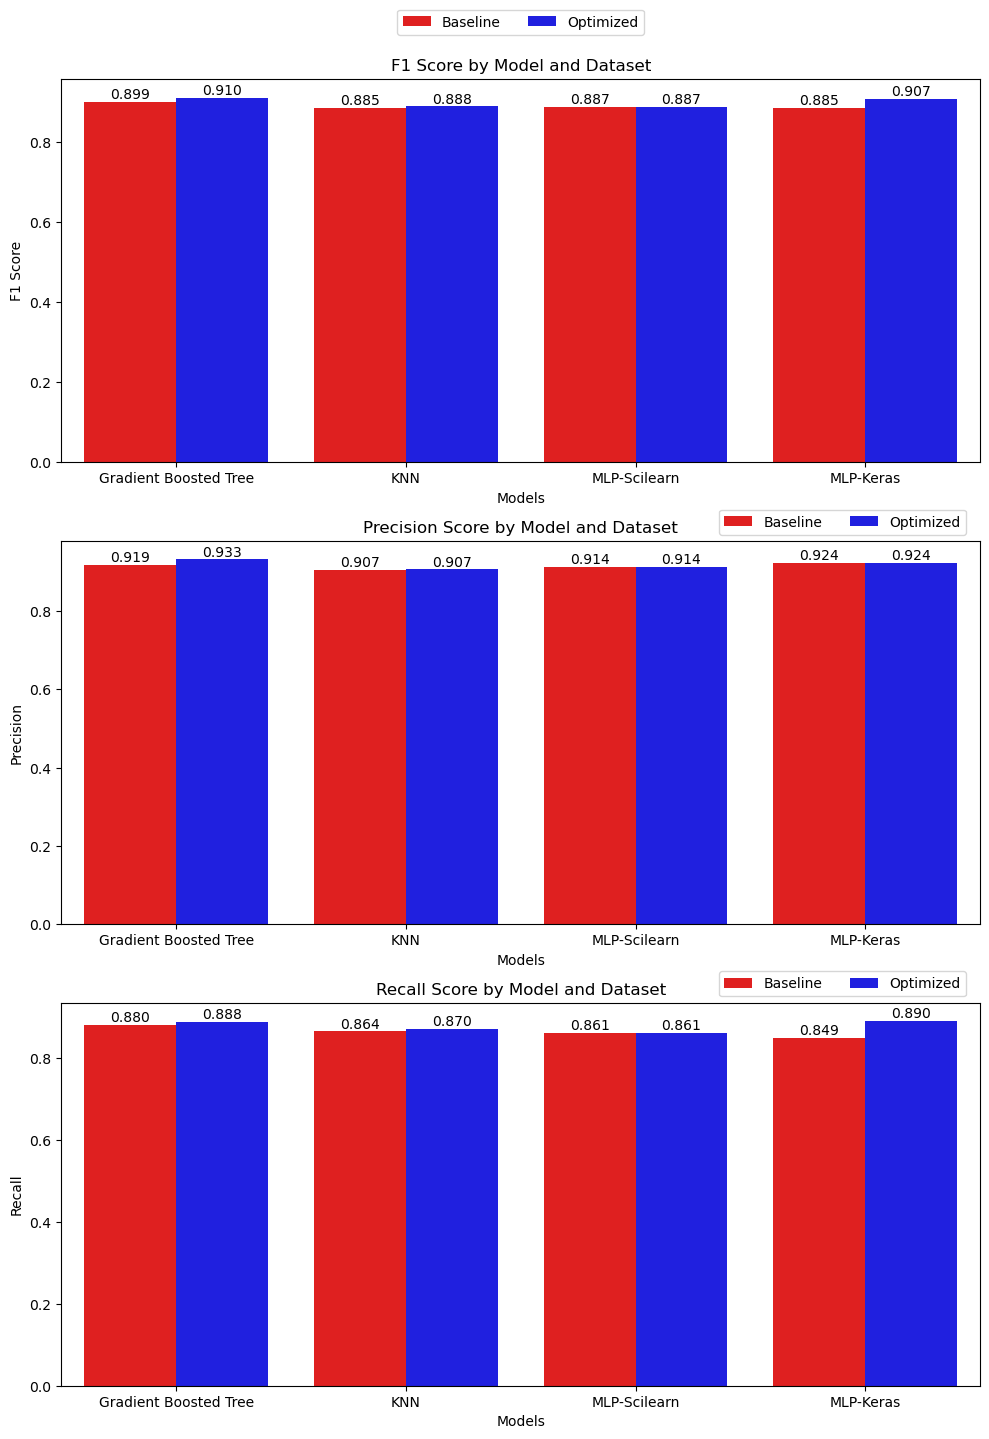

In [141]:
# Define the data
baseline_data = {
    'Model': ['Gradient Boosted Tree', 'KNN', 'MLP-Scilearn', 'MLP-Keras'],
    'F1 Score': [0.899230, 0.884938, 0.886640, 0.884865],
    'Precision': [0.919233, 0.906529, 0.913769, 0.924340],
    'Recall': [0.880079, 0.864351, 0.861075, 0.848624]
}

optimized_data = {
    'Model': ['Gradient Boosted Tree', 'KNN', 'MLP-Scilearn', 'MLP-Keras'],
    'F1 Score': [0.910007, 0.888294, 0.886640, 0.906845],
    'Precision': [0.933196, 0.907104, 0.913769, 0.924438],
    'Recall': [0.887942, 0.870249, 0.861075, 0.889908]
}

# Convert to pandas dataframe and add 'Dataset' column
baseline_df = pd.DataFrame(baseline_data)
baseline_df['Dataset'] = 'Baseline'
optimized_df = pd.DataFrame(optimized_data)
optimized_df['Dataset'] = 'Optimized'

# Concatenate the two dataframes
data = pd.concat([baseline_df, optimized_df])

# Set the palette for the two datasets
palette = {'Baseline': 'red', 'Optimized': 'blue'}


# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

# Plot F1 Score
sns.barplot(ax=axes[0], x='Model', y='F1 Score', hue='Dataset', data=data, palette=palette)
axes[0].set_title('F1 Score by Model and Dataset')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('F1 Score')

for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Plot Precision
sns.barplot(ax=axes[1], x='Model', y='Precision', hue='Dataset', data=data, palette=palette)
axes[1].set_title('Precision Score by Model and Dataset')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Precision')

for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Plot Recall
sns.barplot(ax=axes[2], x='Model', y='Recall', hue='Dataset', data=data, palette=palette)
axes[2].set_title('Recall Score by Model and Dataset')
axes[2].set_xlabel('Models')
axes[2].set_ylabel('Recall')

for p in axes[2].patches:
    height = p.get_height()
    axes[2].annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Adjust the spacing between subplots
plt.tight_layout()

# Move the legend outside the plot
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
axes[1].legend(loc='upper center', bbox_to_anchor=(0.85, 1.1), ncol=2)
axes[2].legend(loc='upper center', bbox_to_anchor=(0.85, 1.1), ncol=2)

# Display the plot
plt.show()


In [133]:
print('TABLE CONTAINING THE CONFUSION METRICS RESULTS FOR THE FOUR MODELS\n')

cm_df3

TABLE CONTAINING THE CONFUSION METRICS RESULTS FOR THE FOUR MODELS



,Model,True Positive,True Negative,False Positive,False Negative
0,Gradient Boosted Tree,1355,4382,97,171
1,KNN,1328,4343,136,198
2,MLP-Scilearn,1314,4355,124,212
3,MLP-Keras,1358,4368,111,168


**CONFUSION MATRIX RESULTS: BASELINE VS OPTIMIZED MODELS**

In the sphere of fraud detection, a confusion matrix provides deeper insights into the performance of our models beyond conventional accuracy metrics. A scrutiny of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) delivers a comprehensive understanding of the model's proficiency and the ramifications of its mistakes.

**Gradient Boosted Tree (GBT)**: The GBT model exhibited impressive enhancements in its optimized form. It correctly identified 1355 fraudulent transactions (TP) and 4382 legitimate transactions (TN). Simultaneously, it minimized its mistakes with a decline in both False Positives (FP: 97) and False Negatives (FN: 171). The optimization process has evidently augmented the model's precision and recall capabilities.

**K-Nearest Neighbors (KNN)**: Post optimization, the KNN model exhibited marginal improvements in correctly detecting fraudulent cases (TP: 1328) while maintaining a consistent performance in identifying legitimate transactions (TN: 4343) and FP (136) as the baseline. There was a modest decline in FN (198), indicating a small boost in the model's ability to spot fraudulent transactions.

**Multi-Layer Perceptron with Scikit-Learn (MLP-Scilearn)**: Interestingly, there were no observed changes in the confusion matrix results between the baseline and the optimized MLP-Scilearn model. This implies that the optimization process did not have a substantial impact on the performance of this model in detecting fraudulent transactions.

**Multi-Layer Perceptron with Keras (MLP-Keras)**: On the other hand, the MLP-Keras model showed a substantial leap in its optimized performance. It correctly identified a higher number of fraudulent transactions (TP: 1358) while maintaining a robust detection rate for non-fraudulent transactions (TN: 4368). Most notably, it succeeded in decreasing both types of errors – FP (111) and FN (168).

In fraud detection, minimizing both FP and FN is crucial. FP might lead to unwarranted customer dissatisfaction due to falsely flagged transactions, while FN can result in unnoticed fraudulent transactions causing potential monetary loss. Therefore, a model that adeptly reduces both these errors is deemed highly effective.

Considering the above analysis, the optimization process has yielded noteworthy improvements, particularly for the Gradient Boosted Tree and MLP-Keras models. They both effectively reduced the number of errors (FP and FN) and enhanced their correct predictions (TP and TN). This vividly illustrates the merit of model optimization in enhancing the effectiveness of fraud detection strategies.


Below, you will find a series of comparative plots that visually articulate the performance of our baseline and optimized models in terms of the confusion matrix. Each graph presents a specific component of the confusion matrix - True Positives, True Negatives, False Positives, and False Negatives - allowing us to examine how the models have improved after optimization. These visual representations provide a quick and effective way to assess model performance in correctly and incorrectly identifying fraud cases, and illustrate the enhancements achieved through the optimization process. By comparing these metrics, we gain insights into the effectiveness of our models in classifying true fraud cases and avoiding false alarms.

In [144]:
# Baseline models
baseline_data = pd.DataFrame({
    "Model": ["Gradient Boosted Tree", "KNN", "MLP-Scilearn", "MLP-Keras"],
    "True Positive": [1343, 1319, 1314, 1295],
    "True Negative": [4361, 4343, 4355, 4373],
    "False Positive": [118, 136, 124, 106],
    "False Negative": [183, 207, 212, 231],
    "Dataset": ["Baseline"]*4
})

# Optimized models
optimized_data = pd.DataFrame({
    "Model": ["Gradient Boosted Tree", "KNN", "MLP-Scilearn", "MLP-Keras"],
    "True Positive": [1355, 1328, 1314, 1358],
    "True Negative": [4382, 4343, 4355, 4368],
    "False Positive": [97, 136, 124, 111],
    "False Negative": [171, 198, 212, 168],
    "Dataset": ["Optimized"]*4
})

# Combine the two datasets
data = pd.concat([baseline_data, optimized_data])

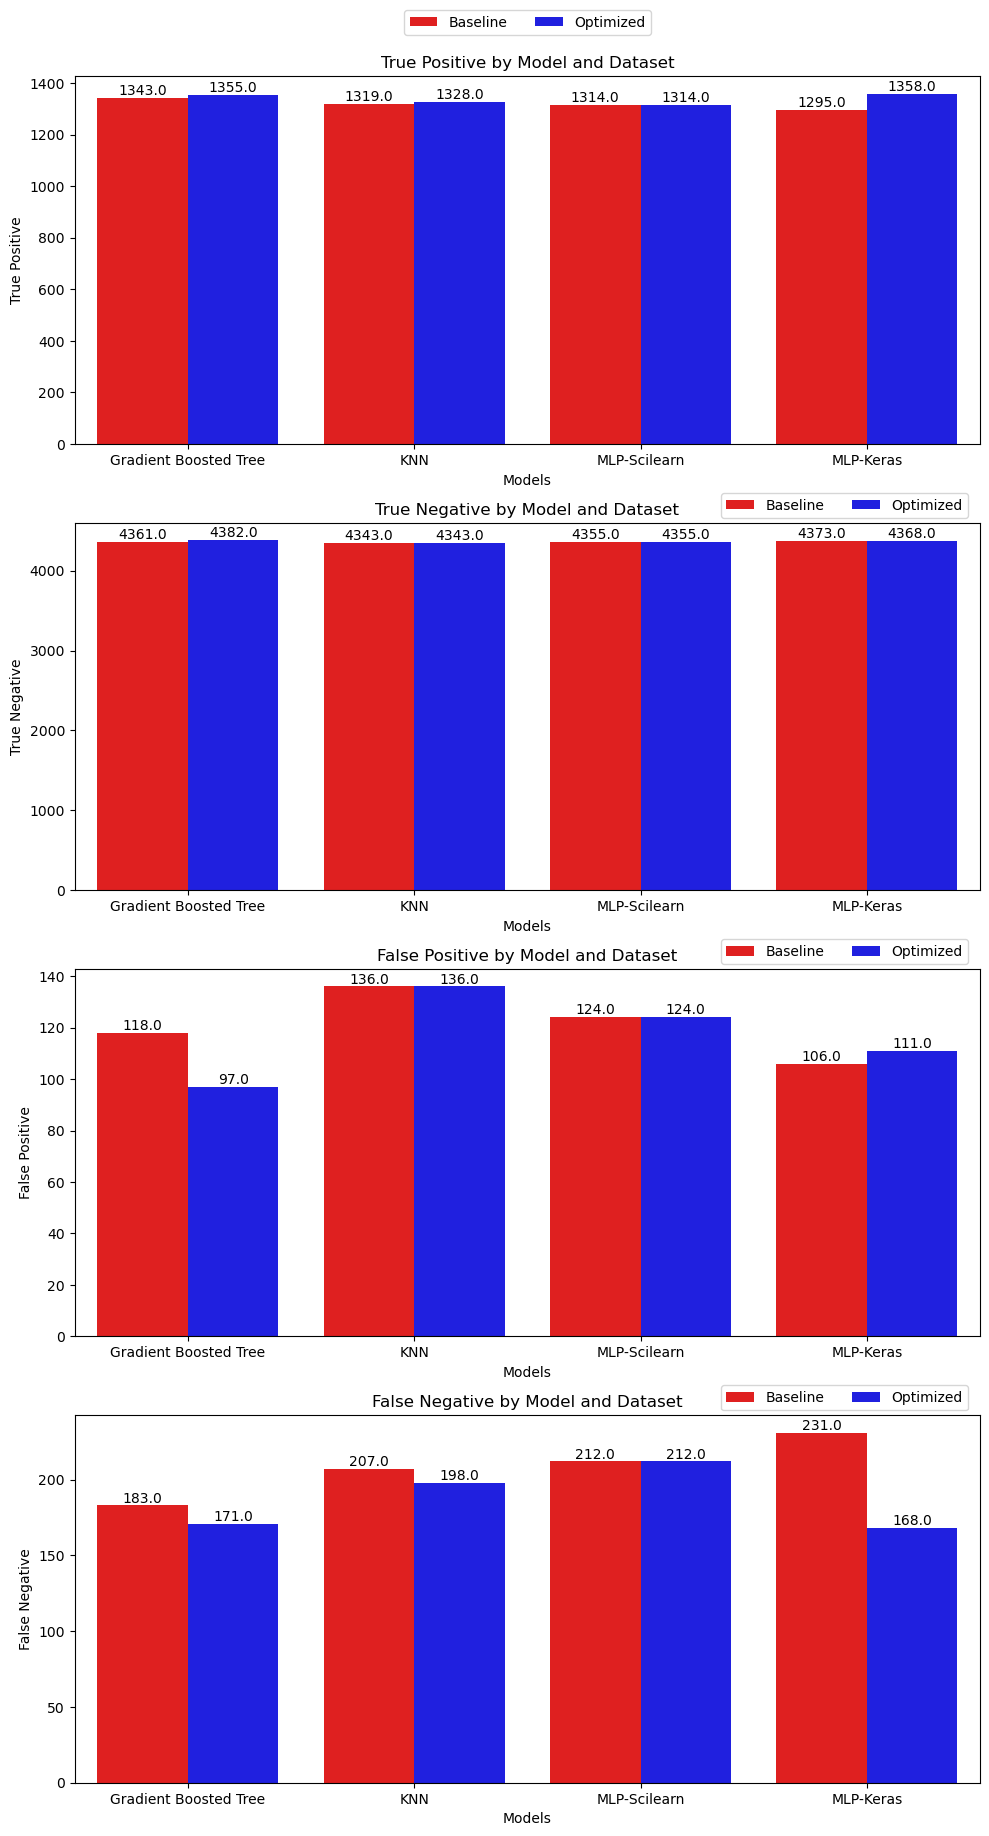

In [147]:
# Set the palette for the two datasets
palette = {'Baseline': 'red', 'Optimized': 'blue'}

# Create a figure with four subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

# Plot True Positive
sns.barplot(ax=axes[0], x='Model', y='True Positive', hue='Dataset', data=data, palette=palette)
axes[0].set_title('True Positive by Model and Dataset')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('True Positive')

for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Plot True Negative
sns.barplot(ax=axes[1], x='Model', y='True Negative', hue='Dataset', data=data, palette=palette)
axes[1].set_title('True Negative by Model and Dataset')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('True Negative')

for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Plot False Positive
sns.barplot(ax=axes[2], x='Model', y='False Positive', hue='Dataset', data=data, palette=palette)
axes[2].set_title('False Positive by Model and Dataset')
axes[2].set_xlabel('Models')
axes[2].set_ylabel('False Positive')

for p in axes[2].patches:
    height = p.get_height()
    axes[2].annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Plot False Negative
sns.barplot(ax=axes[3], x='Model', y='False Negative', hue='Dataset', data=data, palette=palette)
axes[3].set_title('False Negative by Model and Dataset')
axes[3].set_xlabel('Models')
axes[3].set_ylabel('False Negative')

for p in axes[3].patches:
    height = p.get_height()
    axes[3].annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Adjust the spacing between subplots
plt.tight_layout()

# Move the legend outside the plot
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
axes[1].legend(loc='upper center', bbox_to_anchor=(0.85, 1.1), ncol=2)
axes[2].legend(loc='upper center', bbox_to_anchor=(0.85, 1.1), ncol=2)
axes[3].legend(loc='upper center', bbox_to_anchor=(0.85, 1.1), ncol=2)


# Display the plot
plt.show()


***CONCLUSION: IMPROVING FRAUD DETECTION WITH MACHINE LEARNING OPTIMIZATION AND SAMPLING TECHNIQUES**

Throughout this portfolio, we explored and delved deep into the world of fraud detection using several machine learning models and effective sampling techniques. The value of these approaches was evident in our analysis and outcomes.

Fraud detection is often challenged by imbalanced data, as fraudulent transactions are typically rare compared to legitimate ones. This imbalance can bias the model towards predicting the majority class, leading to many fraudulent transactions going undetected. To overcome this issue, we used a random undersampling technique. This helped to balance the classes and improve the model's ability to learn and predict the minority class, in this case, the fraudulent transactions.

We evaluated and compared four popular models—Gradient Boosted Trees, K-Nearest Neighbors, and two variants of Multi-Layer Perceptron (one implemented using Scikit-Learn and the other with Keras). Each model was assessed in its baseline and optimized form, showing the potential of optimization to substantially improve results in fraud detection.

Our top performer was the optimized Gradient Boosted Tree model, demonstrating superior results across all evaluation metrics - F1 score, Precision, and Recall. Furthermore, our confusion matrix results provided deeper insight into how each model performed in correctly predicting fraudulent and non-fraudulent transactions, underscoring the importance of reducing both types of errors.

While the optimized Gradient Boosted Tree emerged as the top performer in our study, model selection in practice should consider the specific characteristics of the dataset, computation resources, interpretability, and the relative costs of different types of errors.

In conclusion, this exploration has shown that by employing a strategic combination of models, optimization techniques, and effective sampling strategies, we can develop robust, high-performing solutions for fraud detection. This journey illustrates the potential and versatility of machine learning, providing a valuable reference for similar applications in diverse domains.